# p1

### Linear Regression

In [1409]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.set_printoptions(suppress = True)
import warnings
warnings.filterwarnings("ignore")

In [1410]:
# Train Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p1_train.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        words.append(float(1))
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1411]:
results = np.array(results)

In [1412]:
# Train labels for 10,000 samples
y_train = results[:,[2]]

In [1413]:
# Train features for 10,000 samples
X_train = np.delete(results, 2, axis = 1)
X_train = np.array([X_train[:,2], X_train[:,0], X_train[:,1]])
X_train = X_train.transpose()

In [1414]:
# MSE loss
def MSEloss(X, y, W):
    return 1 / X.shape[0] * np.linalg.norm(np.matmul(X, W) - y) ** 2

In [1415]:
def MAEloss(X, y, W):
    return 1 / X.shape[0] * np.linalg.norm(np.matmul(X, W) - y, ord = 1)

In [1416]:
# Initial guess for W
W_initial = np.array([[0], [0], [0]])

In [1417]:
def ExactLineSearch(X, y, W, BOUND, niter = 1e10):
    bound = np.inf
    iterations = 0
    while bound > BOUND and iterations < niter:    
        # Hessian
        H = np.matmul(np.transpose(X), X)
        # gradient
        grad = np.matmul(np.transpose(X), np.matmul(X, W)) - np.matmul(np.transpose(X), y)
        # Step-size
        bound = np.linalg.norm(grad)
        alpha = bound ** 2/ np.dot(np.transpose(grad),np.matmul(H,grad))[0][0]
        # Update
        W = W + alpha * (-grad)
        iterations += 1
#         if iterations % 1000 == 0:
#             print(bound)
    return W

In [1418]:
W_optimum = ExactLineSearch(X_train, y_train, W_initial, 1e-8)

In [1419]:
print('Optimum W is: \n', W_optimum)

Optimum W is: 
 [[ 2.97890114]
 [-1.99964941]
 [-0.99731089]]


In [1420]:
y_pred = np.matmul(X_train, W_optimum)

In [1421]:
# Minimized Mean Square Error loss on the Train Data
print('Mean Square Error loss on Train Data with optimum linear model: ',MSEloss(X_train, y_train, W_optimum))
# Minimized Mean Absolute Error loss on the Train Data
print('Mean Absolute Error loss on Train Data with optimum linear model: ', MAEloss(X_train, y_train, W_optimum))
t, pvalue = stats.ttest_ind(y_pred, y_train)
print('p-value is: ', pvalue[0])

Mean Square Error loss on Train Data with optimum linear model:  5.059684615643717
Mean Absolute Error loss on Train Data with optimum linear model:  1.791753209393997
p-value is:  0.999999999998459


In [1422]:
# Test Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p1_test.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        words.append(float(1))
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1423]:
results = np.array(results)

In [1424]:
# Test labels for 5000 samples
y_test = results[:,[2]]

In [1425]:
# Test features for 5000 samples
X_test = np.delete(results, 2, axis = 1)
X_test = np.array([X_test[:,2], X_test[:,0], X_test[:,1]])
X_test = X_test.transpose()

In [1426]:
y_pred = np.matmul(X_test, W_optimum)

In [1427]:
# Minimized Mean Square Error loss on the Test Data
print('Mean Square Error loss on Test Data with optimum linear model: ',MSEloss(X_test, y_test, W_optimum))
# Minimized Mean Absolute Error loss on the Train Data
print('Mean Absolute Error loss on Test Data with optimum linear model: ', MAEloss(X_test, y_test, W_optimum))
t, pvalue = stats.ttest_ind(y_pred, y_test)
print('p-value is: ', pvalue[0])

Mean Square Error loss on Test Data with optimum linear model:  5.046436003951332
Mean Absolute Error loss on Test Data with optimum linear model:  1.799080053098278
p-value is:  0.9084780712922236


In [1428]:
random_points = np.random.randint(0,9999,1000)
train_random_points = []
train_random_labels = []
for i in range(len(random_points)):
    train_random_points.append(X_train[random_points[i]])
    train_random_labels.append(y_train[random_points[i]])

train_random_points = np.array(train_random_points)
train_random_labels = np.array(train_random_labels)

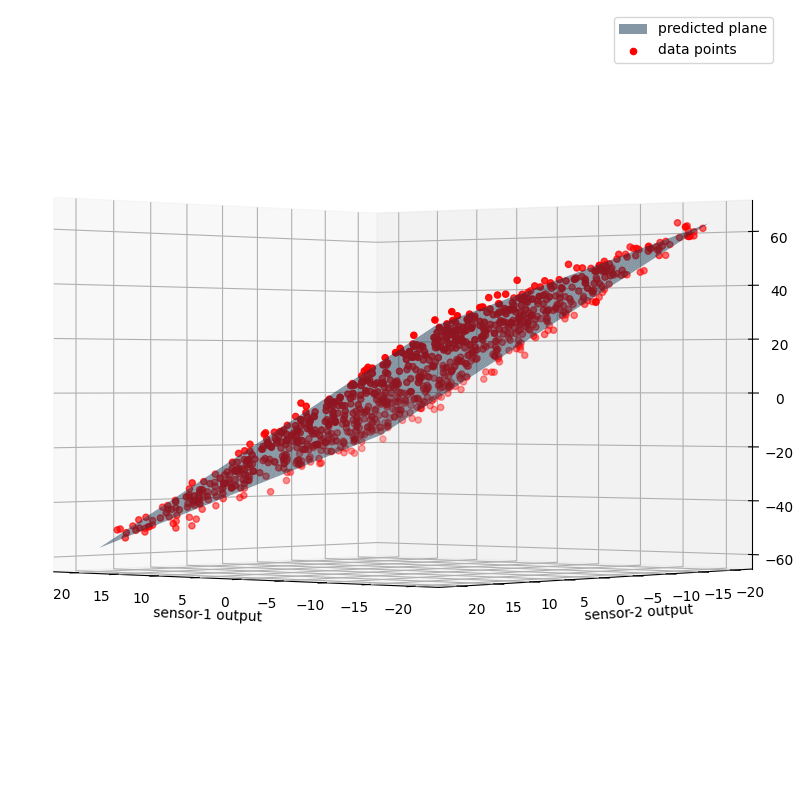

In [1429]:
# Create the figure
fig = plt.figure(figsize = (100, 10))

# Add an axes
ax = fig.add_subplot(111,projection='3d')

xx = np.arange(-20,20,0.1)
yy = np.arange(-20,20,0.1)
xx,yy = np.meshgrid(xx,yy)

z = W_optimum[0] + (W_optimum[1]* xx) + (W_optimum[2] * yy)

# plot the surface
surf1 = ax.plot_surface(xx, yy, z, alpha=0.5, label = 'predicted plane')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
ax.legend()
plt.xlabel("sensor-1 output")
plt.ylabel("sensor-2 output")

# and plot the point 
ax.scatter3D(train_random_points[:,[1]],train_random_points[:,[2]], train_random_labels, color = "red", label = 'data points')
ax.legend(loc = 'upper right')
ax.view_init(0,130)

# p2

### Non-Linear Regression

In [1430]:
# Train Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p2_train.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        words.append(float(1))
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1431]:
results = np.array(results)

In [1432]:
# Train labels for 10,000 samples
y_train = results[:,[3]]
y_train = y_train / (np.max(y_train) - np.min(y_train))

In [1433]:
#Train features for 10,000 samples
X_train = np.delete(results, 3, axis = 1)
X_train = np.array([X_train[:,3] , X_train[:,0], X_train[:,1], X_train[:,2]])
X_train = X_train.transpose()

In [1434]:
def normalize_data(X):
    means = np.mean(X, axis = 0)
    std   = np.std(X, axis = 0)
    n = std.shape[0]
    for i in range(n):
        if std[i] == 0:
            std[i] = 1
    X_normalized = (X-means)/std
    return X_normalized, means, std

In [1509]:
# Returns Maximum index in a list

def MaxLabel(Posts):
    Max = 0
    index = 0
    for i in range(len(Posts)):
        if Posts[i] > Max:
            Max = Posts[i]
            index = i
    return index

In [1435]:
X_trainNorm = minmaxNormalize(X_train)

In [1436]:
X_trainNorm[:,[0]] = np.ones(X_trainNorm[:,[0]].shape)

In [1437]:
# Train Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p2_test.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        words.append(float(1))
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1438]:
results = np.array(results)

In [1439]:
y_test = results[:,[3]]
y_test = y_test / (np.max(y_test) - np.min(y_test))

In [1440]:
X_test = np.delete(results, 3, axis = 1)
X_test = np.array([X_test[:,3] , X_test[:,0], X_test[:,1], X_test[:,2]])
X_test = X_test.transpose()

In [1441]:
X_testNorm = minmaxNormalize(X_test)
X_testNorm[:,[0]] = np.ones(X_testNorm[:,[0]].shape)

In [1442]:
def NonLinearity(Z, X_train, X_test, X_trainNorm, X_testNorm):
    if Z == 1:
        X1 = np.ones([X_train.shape[0], 7])
        X2 = np.ones([X_test.shape[0], 7])
        X1[:,[0]] = (X_train[:,[0]] )
        X1[:,[1]] = (X_train[:,[1]] ) ** 2
        X1[:,[2]] = (X_train[:,[2]] ) ** 2
        X1[:,[3]] = (X_train[:,[3]] ) ** 2
        X1[:,[4]] = np.multiply(X_train[:,[1]], X_train[:,[2]])
        X1[:,[5]] = np.multiply(X_train[:,[2]], X_train[:,[3]])
        X1[:,[6]] = np.multiply(X_train[:,[3]], X_train[:,[1]])

        X2[:,[0]] = (X_test[:,[0]] )
        X2[:,[1]] = (X_test[:,[1]] ) ** 2
        X2[:,[2]] = (X_test[:,[2]] ) ** 2
        X2[:,[3]] = (X_test[:,[3]] ) ** 2
        X2[:,[4]] = np.multiply(X_test[:,[1]], X_test[:,[2]])
        X2[:,[5]] = np.multiply(X_test[:,[2]], X_test[:,[3]])
        X2[:,[6]] = np.multiply(X_test[:,[3]], X_test[:,[1]])
    elif Z == 2:
        X1 = np.ones(X_trainNorm.shape)
        X2 = np.ones(X_testNorm.shape)
        X1[:,[0]] = (X_trainNorm[:,[0]] )
        X1[:,[1]] = np.arcsin(X_trainNorm[:,[1]])
        X1[:,[2]] = np.arccos(X_trainNorm[:,[2]])
        X1[:,[3]] = np.arctan(X_trainNorm[:,[3]])
        X2[:,[0]] = (X_test[:,[0]])
        X2[:,[1]] = np.arcsin(X_testNorm[:,[1]])
        X2[:,[2]] = np.arccos(X_testNorm[:,[2]])
        X2[:,[3]] = np.arctan(X_testNorm[:,[3]])
    elif Z == 3:
        X1 = np.ones([X_trainNorm.shape[0], 6])
        X2 = np.ones([X_testNorm.shape[0], 6])
        X1[:,[0]] = X_trainNorm[:,[0]]
        X1[:,[1]] = np.exp(X_trainNorm[:,[1]])
        X1[:,[2]] = np.arctan(X_train[:,[2]])
        X1[:,[3]] = np.multiply(X_trainNorm[:,[3]], X_trainNorm[:,[2]])
        X1[:,[4]] = np.exp(X_trainNorm[:,[1]] ** 2)
        X1[:,[5]] = np.multiply(np.exp(X_trainNorm[:,[2]]), np.arcsin(X_trainNorm[:,[1]]))
        X2[:,[0]] = (X_testNorm[:,[0]])
        X2[:,[1]] = np.exp(X_testNorm[:,[1]])
        X2[:,[2]] = np.arctan(X_testNorm[:,[2]])
        X2[:,[3]] = np.multiply(X_testNorm[:,[3]], X_testNorm[:,[2]])
        X2[:,[4]] = np.exp(X_testNorm[:,[1]] ** 2)
        X2[:,[5]] = np.multiply(np.exp(X_testNorm[:,[2]]), np.arcsin(X_testNorm[:,[1]]))
    return X1, X2
# X1[:,[3]] = X_train[:,[3]]

In [1443]:
Z = [1, 2, 3]
Name = ['Polynomial', 'Sinusoidal', 'Exponential']
for item in Z:
    X1, X2 = NonLinearity(item, X_train, X_test, X_trainNorm, X_testNorm)
#     print(X1.shape)
    W_init = np.zeros([X1.shape[1], 1])
#     print(W_init.shape)
    W_optimum = ExactLineSearch(X1, y_train, W_init, 1e-8)
    y_pred = np.matmul(X1, W_optimum)
    print('Nonlinearity = ', Name[item - 1] ,'\n')
    # Minimized Mean Square Error loss on the Train Data
    print('Mean Square Error loss on Train Data with optimum linear model: ', MSEloss(X1, y_train, W_optimum))
    # Minimized Mean Absolute Error loss on the Train Data
    print('Mean Absolute Error loss on Train Data with optimum linear model: ', MAEloss(X1, y_train, W_optimum))

    t, pvalue = stats.ttest_ind(y_pred, y_train)
    print('p-value is: ', pvalue[0])
    print('\n')
    
    y_pred = np.matmul(X2, W_optimum)
    print('Mean Square Error loss on Test Data with optimum linear model: ', MSEloss(X2, y_test, W_optimum))
    # Minimized Mean Absolute Error loss on the Train Data
    print('Mean Absolute Error loss on Test Data with optimum linear model: ', MAEloss(X2, y_test, W_optimum))
    
    t, pvalue = stats.ttest_ind(y_pred, y_test)
    print('p-value is: ', pvalue[0])
    print('\n\n')

Nonlinearity =  Polynomial 

Mean Square Error loss on Train Data with optimum linear model:  0.003502695633577418
Mean Absolute Error loss on Train Data with optimum linear model:  0.043301290798731594
p-value is:  0.9999999995747281


Mean Square Error loss on Test Data with optimum linear model:  0.003809012158144592
Mean Absolute Error loss on Test Data with optimum linear model:  0.04466949505623271
p-value is:  0.6258766958156505



Nonlinearity =  Sinusoidal 

Mean Square Error loss on Train Data with optimum linear model:  0.012119891095250716
Mean Absolute Error loss on Train Data with optimum linear model:  0.07706537510715876
p-value is:  0.9999999991706077


Mean Square Error loss on Test Data with optimum linear model:  0.013106455044916317
Mean Absolute Error loss on Test Data with optimum linear model:  0.07841319517681597
p-value is:  0.0460311640617559



Nonlinearity =  Exponential 

Mean Square Error loss on Train Data with optimum linear model:  0.005412600145292106

# p3

### (a) Normal Class-Conditional Density

In [1557]:
def ClassWisePartition(Data, Y, labels):
    H , W = Data.shape
    Data_class = {x: [] for x in labels}
    for item in labels:    
        Data_class[item] = Data[Y == item]
    return Data_class

In [1558]:
def NormalDensity(X, Mu, Sigma):
#     print(X.shape)
#     print(Mu.shape)
    Z = X - Mu
    dim = X.shape[0]
    InverseSigma = np.linalg.inv(Sigma)
#     print(InverseSigma.shape)
#     print(Z.shape)
    
    DetSigma = np.linalg.det(Sigma)
#     print("Normal ", DetSigma)
    K = (DetSigma ** -0.5) * (2* np.pi) ** (-dim / 2)
    #print(K)
    return K * np.exp(- 0.5 * np.dot(np.transpose(Z), np.matmul(InverseSigma, Z))) 

In [1559]:
def metrics(predicted_labels, test_labels):
    
    # Accuracy
    
    Accuracy = 0
    for i in range(len(test_labels)):
        if predicted_labels[i] == test_labels[i]:
            Accuracy += 1
    Accuracy /= len(predicted_labels)
    Accuracy *= 100
    print('Classification Accuracy  on Test Data is: ', Accuracy, '\n')
    
    # Confusion Matrix
    
    ConfMatrix = np.zeros([classes, classes])
    
    for i in range(len(test_labels)):
        ConfMatrix[test_labels[i] - 1, predicted_labels[i] - 1] += 1
    print('Confusion Matrix is: \n', ConfMatrix, '\n')
    
    # Precision
    
    Precision = []
    for i in range(classes):
        Precision.append(ConfMatrix[i][i] / np.sum(ConfMatrix[:,i]))
    
    # Recall
    
    Recall = []
    for i in range(classes):
        Recall.append(ConfMatrix[i][i] / np.sum(ConfMatrix[i,:]))
    
    # f1 Score
    
    f1Score = []
    for i in range(classes):
        f1Score.append(2 * Recall[i] * Precision[i] / (Recall[i] + Precision[i]))
        print('f1 Score of Class ', i + 1 , ' is: ', f1Score[i])

In [1560]:
# Train Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p3_train.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1561]:
Data_train = np.array(results)
train_labels = Data_train[:,10].astype(int)
N, features = Data_train.shape
features -= 1

In [1562]:
labels = np.unique(Data_train[:,10].astype(int))
classes = len(labels)

In [1563]:
Data_classwise = ClassWisePartition(Data_train, train_labels, labels)

In [1564]:
for i in range(1, classes + 1):
    Data_classwise[i] = np.delete(Data_classwise[i], 10, axis = 1)

In [1565]:
ClassPrior = []
ClassCount = []
for i in labels:
    ClassCount.append(len(Data_classwise[i]))
    ClassPrior.append(len(Data_classwise[i])/ N)

In [1566]:
ClassConMeans = []
ClassConVars = []
for i in labels:
    ClassConMeans.append(np.mean(Data_classwise[i], axis = 0))
    ClassConVars.append(np.cov(Data_classwise[i], rowvar = False))

In [1567]:
# Test Data
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p3_test.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1568]:
Data_test = np.array(results)
M, features = Data_test.shape
features -= 1

In [1569]:
test_labels = Data_test[:,10].astype(int)
test_features = np.delete(Data_test, 10, axis = 1)
# print(test_features[0].shape)

In [1570]:
def Scores(X, Means, Variances, Priors):
    scores_list = []
    for i in range(classes):
        scores_list.append(NormalDensity(X, Means[i], Variances[i]) * Priors[i])
    return scores_list

In [1571]:
predicted_labels = []
for i in range(M):
    scores = Scores(test_features[i], ClassConMeans, ClassConVars, ClassPrior)
    predicted_labels.append(scores.index(max(scores)) + 1)
predicted_labels = np.array(predicted_labels)

In [1572]:
metrics(predicted_labels, test_labels)

Classification Accuracy  on Test Data is:  59.38666666666666 

Confusion Matrix is: 
 [[1629.  363.  261.  345.  373.]
 [ 381. 1746.  277.  269.  308.]
 [ 299.  298. 1912.  240.  291.]
 [ 321.  335.  253. 1796.  270.]
 [ 364.  310.  231.  303. 1825.]] 

f1 Score of Class  1  is:  0.5461860854987427
f1 Score of Class  2  is:  0.5788165091994033
f1 Score of Class  3  is:  0.640107130900569
f1 Score of Class  4  is:  0.6059379217273954
f1 Score of Class  5  is:  0.5983606557377049


### (b) Laplacian Class Conditional Density

In [1460]:
def LaplaceVariance(X, Mu):
    N = X.shape[0]
    Var = []
    for i in range(X.shape[1]):
        Var.append(np.mean(abs(X[:,i] - Mu[i])))
    return Var

In [1461]:
def LaplaceDensity(x, Mu, Sigma):
    return 0.5 * np.exp(- abs(x - Mu) / Sigma) / Sigma

In [1462]:
def LaplaceScores(X, Mu, Var):
    laplacescore = 1
    for i in range(X.shape[0]):
        laplacescore *= LaplaceDensity(X[i], Mu[i], Var[i])
    return laplacescore

In [1463]:
LapConMeans = []
LapConVars = []
for i in range(classes):
    LapConMeans.append(np.median(Data_classwise[i + 1], axis = 0))
for i in range(classes):
    LapConVars.append(LaplaceVariance(Data_classwise[i + 1], LapConMeans[i]))

In [1464]:
predicted_labels = []
for j in range(test_features.shape[0]):
    LScores = []
    for i in range(classes):
        LScores.append(LaplaceScores(test_features[j], LapConMeans[i], LapConVars[i]) * ClassPrior[i])
    predicted_labels.append(MaxLabel(LScores) + 1)
predicted_labels = np.array(predicted_labels)

In [1465]:
metrics(predicted_labels, test_labels)

Classification Accuracy  on Test Data is:  56.70666666666667 

Confusion Matrix is: 
 [[1481.  415.  285.  360.  430.]
 [ 377. 1700.  291.  274.  339.]
 [ 320.  316. 1838.  264.  302.]
 [ 338.  350.  261. 1741.  285.]
 [ 388.  323.  245.  331. 1746.]] 

f1 Score of Class  1  is:  0.5041702127659575
f1 Score of Class  2  is:  0.5587510271158587
f1 Score of Class  3  is:  0.6167785234899329
f1 Score of Class  4  is:  0.5857022708158115
f1 Score of Class  5  is:  0.56919315403423


### (c) Multi-Class Logistic Regressor 

In [1466]:
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p3_train.csv', 'r') as f:
    lr_train_features = []
    lr_train_labels=[]
    for line in f:
        temp=[float(1)]
        words = line.split(',')
        for i in range(len(words)-1):
            temp.append(float(words[i]))
        lr_train_features.append(temp)
        lr_train_labels.append(int(float(words[len(words)-1])))                       
    lr_train_features = np.array(lr_train_features)
    lr_train_labels= np.array(lr_train_labels)

In [1467]:
with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p3_test.csv', 'r') as f:
    lr_test_features = []
    lr_test_labels=[]
    for line in f:
        temp=[float(1)]
        words = line.split(',')
        for i in range(len(words)-1):
            temp.append(float(words[i]))
        lr_test_features.append(temp)
        lr_test_labels.append(int(float(words[len(words)-1])))                       
    lr_test_features = np.array(lr_test_features)
    lr_test_labels= np.array(lr_test_labels)

In [1468]:
def softmax_regression(train_features,train_labels,GD_epsilon):
    num_classes=len(set(train_labels))
    num_features=len(train_features[0])
    w=[[0]*num_classes]*(num_features)
    w=np.array(w)
    #print(w.shape)
    lr=1
    grad=np.zeros(w.shape)
    count=0
    htheta=np.array([0]*num_classes)
    while(count==0 or (np.linalg.norm(grad))>GD_epsilon):
        grad=np.zeros(w.shape)
        for i in range(len(train_labels)): 
            y=np.zeros(num_classes)
            for j in range(num_classes):
                htheta[j]=np.dot(np.transpose(w[:,[j]]),train_features[i].reshape((num_features,1)))
            htheta=np.exp(htheta)
            htheta=htheta/np.sum(htheta)
            y[train_labels[i]-1]=1
            grad = grad + np.matmul((train_features[i].reshape((11,1))),(htheta-y).reshape((1,num_classes)))  
        w = w -((lr)*(grad)/len(train_labels))
        count+=1
        #if((count%20)==0):
            #print(np.linalg.norm(grad))
    return w

In [1469]:
weights=softmax_regression(lr_train_features,lr_train_labels,1e-5)

In [1470]:
def getpredlabels(weights,given_features):
    posteriors=[0]*5
    pred_labels=[]
    for i in range(len(given_features)):
        posteriors=np.matmul(np.transpose(weights),(given_features[i].reshape((11,1))))
        pred=np.argmax(posteriors)
        pred_labels.append(pred+1)
    return pred_labels

In [1471]:
pred_labels=getpredlabels(weights,lr_test_features)

In [1472]:
def getempiricalloss(weights,given_features,labels):
    ccloss=0
    for i in range(len(given_features)):
        pred_vector=np.dot(np.transpose(weights),(given_features[i].reshape((11,1))))
        pred_vector=np.exp(pred_vector)
        pred_vector=pred_vector/np.sum(pred_vector)
        ccloss+=np.log(float(pred_vector[labels[i]-1]))
    return -1*(ccloss)/len(given_features)

In [1473]:
print("Empirical Risk on test data is given by :", getempiricalloss(weights,lr_test_features,lr_test_labels))
print("Empirical Risk on train data is given by :", getempiricalloss(weights,lr_train_features,lr_train_labels))

Empirical Risk on test data is given by : 1.1405751746315655
Empirical Risk on train data is given by : 1.143054452135123


In [1474]:
metrics(pred_labels,lr_test_labels)

Classification Accuracy  on Test Data is:  57.32666666666667 

Confusion Matrix is: 
 [[1518.  390.  297.  375.  391.]
 [ 377. 1696.  297.  286.  325.]
 [ 308.  306. 1881.  256.  289.]
 [ 339.  345.  262. 1739.  290.]
 [ 350.  327.  253.  338. 1765.]] 

f1 Score of Class  1  is:  0.5178236397748591
f1 Score of Class  2  is:  0.5611248966087675
f1 Score of Class  3  is:  0.6238805970149254
f1 Score of Class  4  is:  0.5826771653543307
f1 Score of Class  5  is:  0.5793533563105203


In [1475]:
def roc(weights,given_features,threshold):
    posteriors=[0]*5
    pred_labels=[]
    new_labels=[]
    for i in range(len(given_features)):
        if(lr_train_labels[i]>2):
            continue
        new_labels.append(lr_train_labels[i])
        posteriors=np.matmul(np.transpose(weights[:,0:2]),(given_features[i].reshape((11,1))))
        posteriors=np.exp(posteriors)
        posteriors/=np.sum(posteriors)
        pred=1
        if(threshold==0):
            pred_labels.append(pred+1)
        elif(posteriors[pred]>threshold):
            pred_labels.append(pred+1)
        else:
            pred_labels.append(1)    
    return pred_labels,new_labels

def getroclist(weights,lr_train_features):
    roclabellist=[]
    threshold=1
    for i in range(51):
        pred_labels,new_labels=roc(weights,lr_train_features,threshold)
        roclabellist.append(pred_labels)
        threshold-=0.02
    roclabellist.append(roc(weights,lr_train_features,0))
    return roclabellist,new_labels

def getTPRandFPR(roclabellist,lr_train_features,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)-1):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            if(new_labels[j]==1 and roclabellist[i][j]==1):
                TP+=1
            if(new_labels[j]==1 and roclabellist[i][j]==2):
                FN+=1
            if(new_labels[j]==2 and roclabellist[i][j]==1):
                FP+=1
            if(new_labels[j]==2 and roclabellist[i][j]==2):
                TN+=1
            
        #print(TP+TN+FN+FP)
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
    return [TPRlist,FPRlist]

In [1476]:
roclist,newlabels=getroclist(weights,lr_train_features)

In [1477]:
TPRlist,FPRlist=getTPRandFPR(roclist,lr_train_features,newlabels)

Text(0.5, 1.0, 'ROC curve for classes 1 and 2')

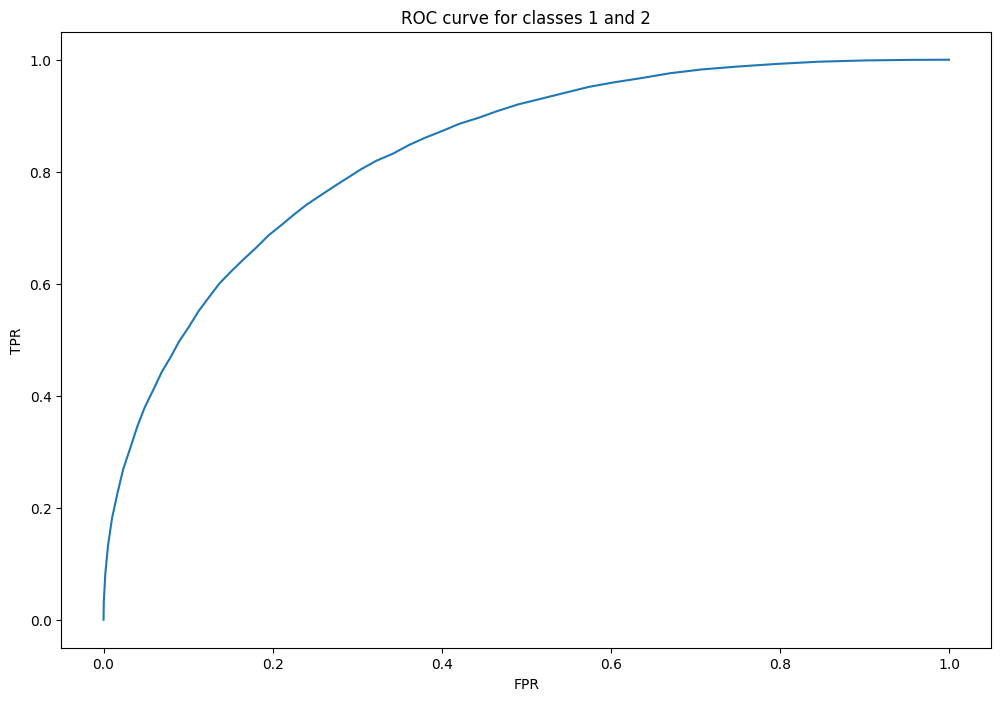

In [1478]:
plt.plot(FPRlist,TPRlist)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for classes 1 and 2')

### b)Linear one vsrest

In [1479]:
def logistic(train_features,train_labels):
    w=[[0]]*11
    w=np.array(w)
#     print(w.shape)
    lr=1
    grad=np.zeros(w.shape)
    count=0
    htheta=np.array([0]*5)
    while(count==0 or (np.linalg.norm(grad))>1e-5):
        grad=np.zeros(w.shape)
        for i in range(len(train_labels)):

            y=train_labels[i]

            htheta=np.dot(np.transpose(w),train_features[i].reshape((11,1)))
            htheta=1/(1+np.exp(-htheta))
            grad = grad + np.matmul((train_features[i].reshape((11,1))),(htheta-y).reshape((1,1)))

        w = w -((lr)*(grad)/60000)
        count+=1
#         if((count%10)==0):
#             print(np.linalg.norm(grad))
    return w

In [1480]:
true_train_labels=lr_train_labels-1
true_test_labels=lr_test_labels-1
lr_train_labels_onevsrest=[np.zeros(lr_train_labels.shape)]*5
lr_train_labels_onevsrest=np.array(lr_train_labels_onevsrest)
for i in range(len(lr_train_labels)):
    for j in range(5):
        if(true_train_labels[i]==j):
            lr_train_labels_onevsrest[j][i]=1

In [1481]:
weights_llr=[]
for k in range(5):
    weights_llr.append(logistic(lr_train_features,lr_train_labels_onevsrest[k]))

In [1482]:
def getpredlabelsone(given_features,labels):
    posteriors=[0]*5
    pred_labels=[]
    for i in range(len(labels)):
        for j in range(5):
            posteriors[j]=np.matmul(np.transpose(weights_llr[j].reshape((11,1))),(given_features[i].reshape((11,1))))
        #print(posteriors)
        pred=np.argmax(posteriors)
        pred_labels.append(pred)
    return pred_labels

In [1483]:
pred_labels=getpredlabelsone(lr_test_features,true_test_labels)

In [1484]:
metrics(pred_labels,true_test_labels)

Classification Accuracy  on Test Data is:  57.32000000000001 

Confusion Matrix is: 
 [[1698.  312.  285.  323.  363.]
 [ 304. 1897.  259.  287.  293.]
 [ 343.  269. 1749.  288.  326.]
 [ 326.  265.  344. 1759.  339.]
 [ 391.  311.  383.  391. 1495.]] 

f1 Score of Class  1  is:  0.5619725302002316
f1 Score of Class  2  is:  0.6225795864785034
f1 Score of Class  3  is:  0.58348623853211
f1 Score of Class  4  is:  0.5785232691991449
f1 Score of Class  5  is:  0.516675306721963


In [1485]:
np.matmul(np.transpose(weights_llr[0].reshape((11,1))),(lr_test_features[0].reshape((11,1))))

array([[-2.39138816]])

In [1486]:
def getempiricalloss(weights_llr,given_features,labels):
    ccloss=0
    for i in range(len(given_features)):
        pred_vector=np.matmul(np.transpose(weights_llr.reshape((11,5))),(given_features[i].reshape((11,1))))
        pred_vector=pred_vector.reshape((1,5))[0]
        pred_vector=np.exp(pred_vector)
        pred_vector=pred_vector/np.sum(pred_vector)
        ccloss+=np.log(float(pred_vector[labels[i]]))
    return -1*(ccloss)/len(given_features)

In [1487]:
print("Empirical Risk on test data is given by :", getempiricalloss(np.array(weights_llr),lr_test_features,true_test_labels))
print("Empirical Risk on train data is given by :", getempiricalloss(np.array(weights_llr),lr_train_features,true_train_labels))

Empirical Risk on test data is given by : 2.9772614294229425
Empirical Risk on train data is given by : 2.9614747623162625


In [1488]:
def rocone(weights,given_features,threshold):
    posteriors=[0]*2
    pred_labels=[]
    new_labels=[]
    temp=0
    for i in range(len(given_features)):
        if(lr_train_labels[i]==1):
            new_labels.append(lr_train_labels[i])
        else:
            new_labels.append(0)
    for i in range(len(given_features)):
        #if(lr_train_labels[i]!=1):
         #   continue
        #new_labels.append(lr_train_labels[i])
        temp=np.matmul(np.transpose(weights[0].reshape((11,1))),(given_features[i].reshape((11,1))))[0]
        posteriors=[1-temp,temp]
        posteriors=np.exp(posteriors)
        posteriors/=np.sum(posteriors)
        #pred=np.argmax(posteriors)
        if(posteriors[1]>threshold):
            pred_labels.append(1)
        else:
            pred_labels.append(0)    
    return pred_labels,new_labels

def getroclistone(weights_llr,lr_train_features):
    roclabellist=[]
    thresh=[0]
    x=0
    for i in range(100):
        x+=0.01
        thresh.append(x)
        #print(x)
    for i in range(101):
        pred_labels,new_labels=rocone(weights_llr,lr_train_features,thresh[i])
        #print(np.sum(pred_labels))
        roclabellist.append(pred_labels)
        #thresh-=0.1
        #print(thresh)
    return roclabellist,new_labels

def getTPRandFPRone(roclabellist,lr_train_features,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            #print(len(new_labels))
            if(new_labels[j]==1 and roclabellist[i][j]==1):
                TP+=1
            if(new_labels[j]==1 and roclabellist[i][j]==0):
                FN+=1
            if(new_labels[j]==0 and roclabellist[i][j]==1):
                FP+=1
            if(new_labels[j]==0 and roclabellist[i][j]==0):
                TN+=1
            
        #print(TP+TN+FN+FP)
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        #print(FPR)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
    return [TPRlist,FPRlist]

In [1489]:
roclist,newlabelsone=getroclistone(weights_llr,lr_train_features)

In [1490]:
TPRlistnew,FPRlistnew=getTPRandFPRone(roclist,lr_train_features,newlabelsone)

Text(0.5, 1.0, 'ROC Curve between class-1 vs rest')

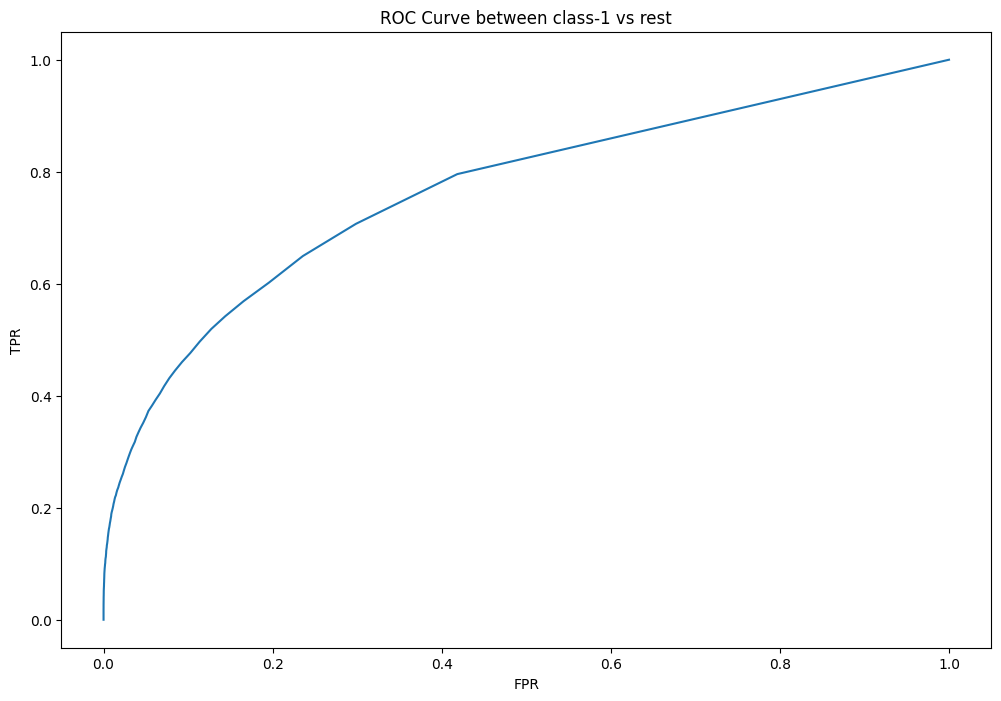

In [1491]:
plt.plot(FPRlistnew,TPRlistnew)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve between class-1 vs rest')
#print(TPRlistnew)

### (d) GMM

In [1573]:
def OptimizedNormalDensity(X, Mu, Sigma):
    Z = X - Mu
    dim = X.shape[0]
    InverseSigma = np.zeros(Sigma.shape)
#     InverseSigma = Sigma
    DetSigma = 1
    for i in range(Sigma.shape[0]):
        InverseSigma[i][i] = 1 / Sigma[i][i]
        DetSigma *= Sigma[i][i]
#     print(DetSigma)

#     print(InverseSigma.shape)
#     print(Z.shape)
#     print("Detsigma ",DetSigma)
#     K = (DetSigma ** -0.5) * (2* np.pi) ** (-dim / 2)
    K = DetSigma ** -0.5
#     print("kvalue", K)
    return K * 1e5 * np.exp(- 0.5 * np.dot(np.transpose(Z), np.matmul(InverseSigma, Z))) 

In [1574]:
# Data Matrix will have all the data points in rows
# Theta_intial will have the guessed parameters
# K denote the no. of Gaussians in the Mixture

def GMM(K, Theta_initial, Data):
    H, W = Data.shape
#     print(H,W)
    Pi, Mu, Sigma = Theta_initial
    Prev_likelihood = 0
    Next_likelihood = 10
    Log = []
    
#     print(Data[0].shape)
#     print(Mu[0].shape)
#     print(Pi[0])
#     print(Mu[0].shape)
#     print((Data[0] - Mu[0]).shape)
#     print(OptimizedNormalDensity(Mu[1], Mu[1], Sigma[1]))
#     return
    # Pi is a list of lambdas
    # Mu is a list of means
    # Sigma is a list of covariance Matrices
    while abs(Next_likelihood - Prev_likelihood) > 1:
        
        # Responsibilities
        Gamma = [] 
        for j in range (H):
            GammaPerPoint = []
            for i in range(K):
    #                 print(Pi[i])
    #                 print(NormalDensity(Data[j], np.transpose(Mu[i]), Sigma[i]))
                GammaPerPoint.append(Pi[i] * OptimizedNormalDensity(Data[j], Mu[i], Sigma[i]))
#                 print(OptimizedNormalDensity(Data[j], Mu[i], Sigma[i]))
    #         print(GammaPerPoint)
            denominator = np.sum(GammaPerPoint)
#             print(denominator)
#             if denominator == 0:
#                 print('zero')
#                 break
            for i in range(K):
                GammaPerPoint[i] = GammaPerPoint[i] / denominator
#             print(np.sum(GammaPerPoint)
    #         break
            Gamma.append(GammaPerPoint)
#             print(np.array(Gamma).shape)
    #         print(Gamma[0][0])
       
        # Now we have gamma values for all X and for all k 
#         print(Gamma)
        # Nk

        Nk = [0] * K
        for i in range(K):
            for j in range(H):
                Nk[i] += Gamma[j][i] 

        # Mu_next

        Mu_next = [0] * K

        for i in range(K):
            for j in range(H):
                Mu_next[i] += Gamma[j][i] * Data[j]
            Mu_next[i] /= Nk[i]

    #         print(Mu_next[0])
        Sigma_next = [0] * K
    
        
        for k in range(K):
            Sig_next = np.identity(features)
            for i in range(features):
                sigma = 0
                for j in range(H):
                    sigma += ((Data[j][i] - Mu_next[k][i])**2)*Gamma[j][k]
                Sig_next[i][i] = sigma / Nk[k]
            Sigma_next[k] = Sig_next
#         print(Sigma_next[0][0])
# #         break

#         for i in range(K):
#             for j in range(H):
#                 q = Data[j] - Mu_next[i]
#                 shape = q.shape
#                 Sigma_next[i] += Gamma[j][i] * np.matmul(q.reshape(shape[0], 1), np.transpose(q.reshape(shape[0], 1)))
#             Sigma_next[i] /= Nk[i]
#             Sigma_next[i] = np.diag(np.diag(Sigma_next[i]))

#         print(Sigma_next[3])/

        # Pi_next
        Pi_next = []
        for item in Nk:
            Pi_next.append(item / H)
#         print(Pi_next)
#         print(sum(Pi_next))

#         return Pi_next, Mu_next, Sigma_next

#         Loglikelihood
        Loglikelihood = 0
        for j in range(H):
            p = 0
            for i in range(K):
                p += Pi_next[i] * OptimizedNormalDensity(Data[j], Mu_next[i], Sigma_next[i])
            Loglikelihood += np.log(p)

        Prev_likelihood = Next_likelihood
        Next_likelihood = Loglikelihood
#         print(Loglikelihood)
        
        Log.append(Loglikelihood)
        Pi = Pi_next
        Mu = Mu_next
        Sigma = Sigma_next

    return [Pi, Mu, Sigma, Log]

In [1575]:
def InitialiseGMM(K, features):
    alpha = np.random.rand(K)
    alpha = alpha / np.sum(alpha)
    Mu_initial = []
    for i in range(K):
        Mu_initial.append(np.random.rand(features))
    Sigma_initial = []
    for i in range(K):
        Sigma_initial.append(np.diag(np.random.rand(features)))
    Theta = [alpha, Mu_initial, Sigma_initial]
    return Theta

In [1579]:
def GetCCD(Data, Params, class_index, components):
    value = 0
    #print(np.sum(Params[1]))
#     print(len(Params))
    for i in range(components):
#         print(OptimizedNormalDensity(Data, Params[class_index][1][i], Params[class_index][2][i]))
#         print(Params[class_index][1][i].shape, Params[class_index][2][i].shape)
        value += 1e10 * Params[class_index][0][i] * NormalDensity(Data, Params[class_index][1][i], Params[class_index][2][i])
#     print(value)
    return value

In [1580]:
mixtures = [3, 8]

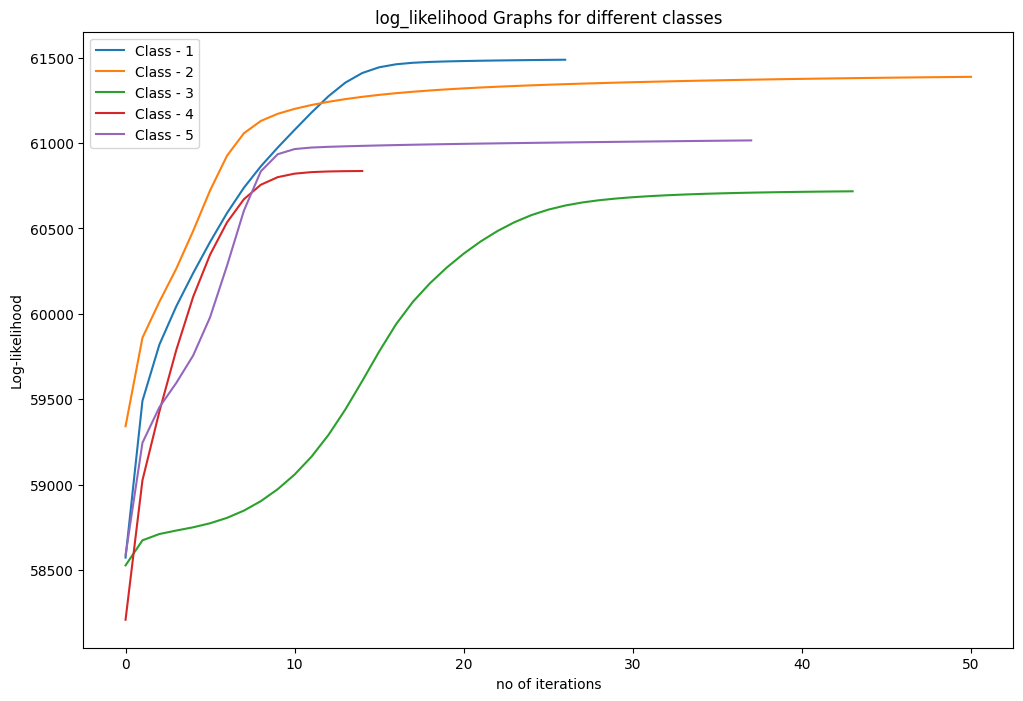

Classification Accuracy  on Test Data is:  58.9 

Confusion Matrix is: 
 [[1696.  366.  230.  321.  358.]
 [ 431. 1730.  241.  273.  306.]
 [ 362.  290. 1858.  229.  301.]
 [ 388.  320.  233. 1757.  277.]
 [ 416.  317.  208.  298. 1794.]] 

f1 Score of Class  1  is:  0.541507024265645
f1 Score of Class  2  is:  0.5762824783477682
f1 Score of Class  3  is:  0.6395869191049913
f1 Score of Class  4  is:  0.6003758756193406
f1 Score of Class  5  is:  0.5912011863568957


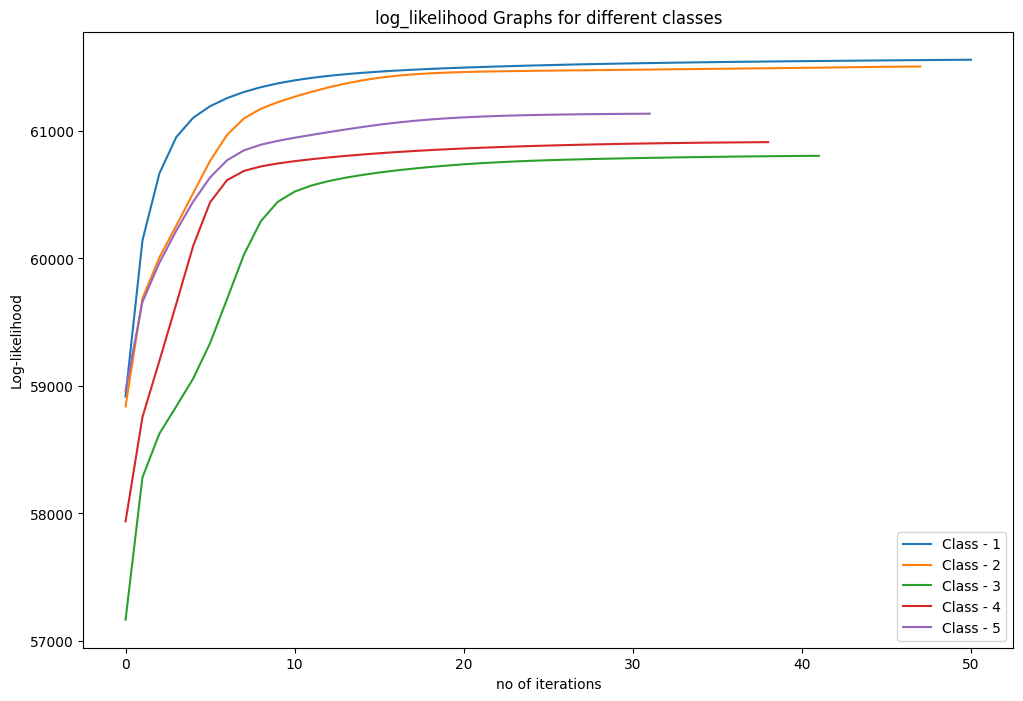

Classification Accuracy  on Test Data is:  58.58 

Confusion Matrix is: 
 [[1653.  386.  240.  321.  371.]
 [ 410. 1726.  255.  275.  315.]
 [ 367.  296. 1845.  228.  304.]
 [ 383.  328.  228. 1749.  287.]
 [ 400.  322.  208.  289. 1814.]] 

f1 Score of Class  1  is:  0.5346054333764554
f1 Score of Class  2  is:  0.5716178175194568
f1 Score of Class  3  is:  0.6344566712517195
f1 Score of Class  4  is:  0.5992804522871339
f1 Score of Class  5  is:  0.5924232527759634


In [1581]:
for K in mixtures:
    Likelihood = []
    Parameters = []
    for i in range(1, classes + 1):
        Theta = InitialiseGMM(K, features)
        Parameters.append(GMM(K, Theta, np.array(Data_classwise[i])))
    for j in range(classes):
        Likelihood.append(Parameters[j][-1])
    # for i in range(classes):
    #     plt.plot(Likelihood[i])
    #     plt.show()
    for i in range(classes):
        plt.plot(Likelihood[i],label = 'Class - {}'.format(i + 1))
        plt.xlabel("no of iterations" )
        plt.ylabel('Log-likelihood')
        plt.legend()
        plt.title('log_likelihood Graphs for different classes')
    plt.show()

    predicted_labels = []
    # print(Parameters[0][0])
    for i in range(test_features.shape[0]):
        Posteriors = np.array([0] * classes)
    #     print(Posteriors.shape)
        for j in range(classes):
            Posteriors[j] = GetCCD(test_features[i], Parameters, j, K) * ClassPrior[j]
    #     print(ClassPrior)
    #     print(Posteriors)
        predicted_labels.append(np.argmax(Posteriors) + 1)

    metrics(predicted_labels, test_labels)

In [1582]:
K_list = [3, 4, 5]
Likelihood_mixtures = []
for item in K_list:
    Theta = InitialiseGMM(item, features)
    Likelihood_mixtures.append(GMM(item, Theta, np.array(Data_classwise[1]))[-1])

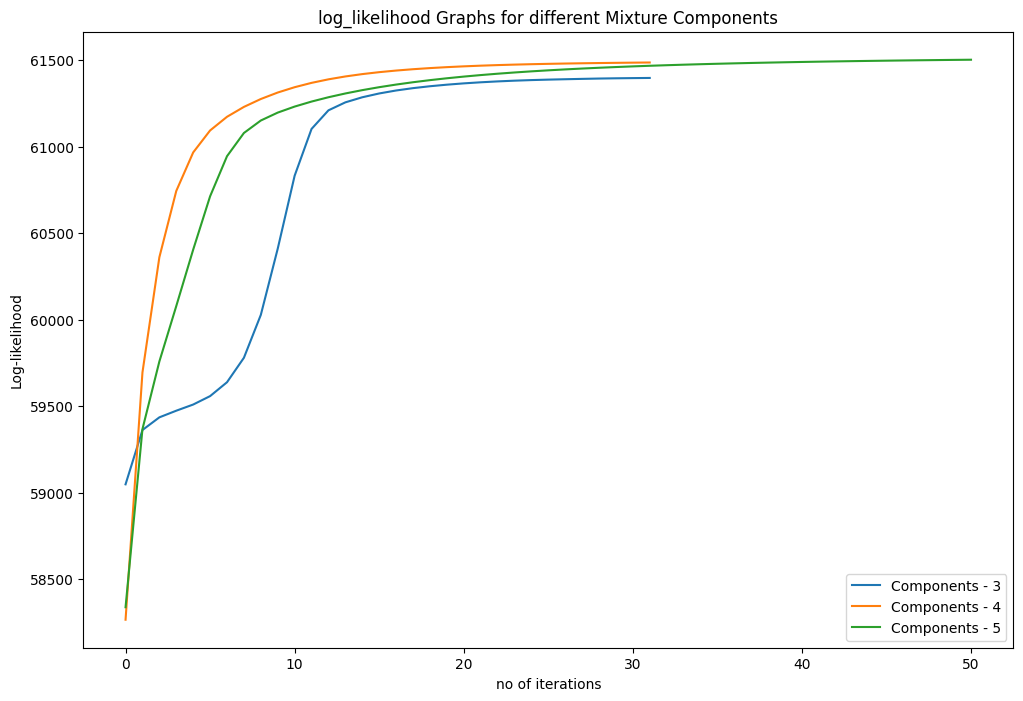

In [1583]:
for i in range(len(K_list)):
    plt.plot(Likelihood_mixtures[i],label = 'Components - {}'.format(i + 3))
    plt.xlabel("no of iterations" )
    plt.ylabel('Log-likelihood')
    plt.legend()
    plt.title('log_likelihood Graphs for different Mixture Components')
plt.show()

### p4

### (a) Naive Bayes' with Normal as Class Conditional 

In [1510]:
def minmaxNormalize(X):
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        if np.max(X[:,i]) != np.min(X[:,i]):
            X_norm[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
#         elif np.max(X[:,i] == np.min(X[:,i])):
#             X_norm[:,i] = np.ones(X_norm[:,i].shape)
    return X_norm

In [1511]:
# Splits the data with given percentage

def DataSplit(Data, train_percent):
    
    # pick your indices for sample 1 and sample 2:
    percent = train_percent
    train_size = int(percent * Data.shape[0] / 100)
    test_size = Data.shape[0] - train_size

    train_indices = np.random.choice(range(Data.shape[0]), train_size, replace=False)
    test_indices = list(set(range(Data.shape[0])) - set(train_indices))

    # extract your samples:
    DTrain = Data[train_indices, :]
    DTest = Data[test_indices, :]
    return DTrain, DTest

In [1512]:
# Returns the Mean and Variance of all features in a list per class

def FeatureMeanVar(X):
    Mean = []
    Var = []
    for i in range(X.shape[1]):
        Mean.append(np.mean(X[:,i]))
        Var.append(np.mean((X[:,i] - Mean[i])** 2))
    return Mean, Var

In [1513]:
# Returns Univariate Normal density at a point with a given mean and variance

def UniNormal(x , mean , var):
    if var == 0:
        return 1
    else:
        return 1e4 * (1 / ((2 * np.pi) ** 0.5 * var )) * np.exp(-0.5 * (x-mean) ** 2 / var)

In [1514]:
# Calculated the Posterior probabilities (scaled)

def Posts(X, Mean, Var, Priors, labels):
    Probs = []
    for i in range(labels.shape[0]):
        prob = 1
        for j in range(X.shape[0]):
            prob *= UniNormal(X[j], Mean[i][j], Var[i][j])
        Probs.append(prob * Priors[i])
    return Probs

In [1515]:
# Data

with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/p4_train.csv', 'r') as f:
    results = []
    next(f)
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1516]:
Data = np.array(results)
N, features = Data.shape
features -= 1

In [1517]:
Percentages = [20, 30, 50, 70, 90]
for item in Percentages:
    
    # Split the data first wrt the given percentage
    
    DTrain, DTest = DataSplit(Data, item)
    N = DTrain.shape[0]
    test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
    XDTest = np.delete(DTest, 0 , axis = 1)
    labels = np.unique(Data[:,0].astype(int))
    classes = len(labels)
    train_labels = DTrain[:,0].astype(int)
    
    # Split the Data train class wise
    
    Data_classwise = ClassWisePartition(DTrain, train_labels, labels)
    for i in range(classes):
        Data_classwise[i] = np.delete(np.array(Data_classwise[i]), 0 , axis = 1)
        
    # Mean and Variance of each feature for each class taken into a double list
    
    Mean = []
    Var = []
    for i in range(classes):
        m , v = FeatureMeanVar(Data_classwise[i])
        Mean.append(m)
        Var.append(v)
        
    # Prior probabilities
    
    Priors = []
    for i in range(classes):
        Priors.append(Data_classwise[i].shape[0] / N)
        
    # Predictions
    
    predicted_labels = []
    for i in range(XDTest.shape[0]):
        predicted_labels.append(MaxLabel(Posts(XDTest[i], Mean, Var, Priors, labels)) + 1)
    
    # Metrics
    
    print('Metrics with ', item, '% Train Data and tested on ',(100 - item),'% Test Data: \n \n')
    metrics(predicted_labels, test_labels)
    print('\n\n')

Metrics with  20 % Train Data and tested on  80 % Test Data: 
 

Classification Accuracy  on Test Data is:  79.23541666666667 

Confusion Matrix is: 
 [[4624.   33.   12.   63.    3.   28.    0.    4.   16.    1.]
 [2446. 2001.   12.  180.    1.   78.    0.   16.   14.   29.]
 [ 131.    0. 4622.   14.    0.   34.    0.    0.    2.    1.]
 [  60.    0.   25. 3197.   18.   68.   19. 1425.    1.   16.]
 [  32.    0.   23.  580. 3179.  394.    1.  341.    9.  217.]
 [ 104.    0.   12.  331.   14. 4299.    0.   14.    2.    4.]
 [  51.    0.    8.   44.    0.    2. 3149. 1545.    1.    8.]
 [  43.    0.    9.  161.   10.   30.  307. 4229.    3.   17.]
 [ 321.    0.   17.    1.    4.  120.    5.    3. 4278.   79.]
 [  68.    0.   25.   36.   12.   28.    5.  109.   67. 4455.]] 

f1 Score of Class  1  is:  0.7302590018951358
f1 Score of Class  2  is:  0.5875789164586699
f1 Score of Class  3  is:  0.966036158428258
f1 Score of Class  4  is:  0.6776176345909283
f1 Score of Class  5  is:  0.7930

### (b) Logistic Regression with Gradient Descent

In [1523]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
def softmax_regression_p4(train_features,train_labels,GD_epsilon):
    num_classes=len(set(train_labels))
#     print(num_classes)
    num_features=len(train_features[0])
    w=[[0]*num_classes]*(num_features)
    w=np.array(w)
#     print(w.shape)
    lr=0.8
    grad=np.zeros(w.shape)
    count=0
    htheta=np.array([0]*10)
    while(count==0 or (np.linalg.norm(grad))>GD_epsilon):
        grad=np.zeros(w.shape)
        for i in range(len(train_labels)): 
            y=np.zeros(num_classes)
            for j in range(num_classes):
                htheta[j]=np.dot(np.transpose(w[:,[j]]),train_features[i].reshape((784,1)))
            #print(htheta)
#             htheta=np.exp(htheta)
#             htheta=htheta/np.sum(htheta)
            htheta=softmax(htheta)
            y[train_labels[i]]=1
            grad = grad + np.matmul((train_features[i].reshape((784,1))),(htheta-y).reshape((1,10)))  
        w = w -((lr)*(grad)/len(train_labels))
        count+=1
#         if((count%15)==0):
#             print(np.linalg.norm(grad),count)
        if(count==200):
            break
            
    return w

In [1524]:
split_data_train=[]
split_train_labels=[]
split_data_test=[]
split_test=[]
weight_matrix=[]
#print(Data)
Percentages=[20,30,50,70,90]
for item in Percentages:
    
    # Split the data first wrt the given percentage
    i=0
    DTrain, DTest = DataSplit(Data, item)
    N = DTrain.shape[0]
    test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
    XDTest = np.delete(DTest, 0 , axis = 1)
    labels = np.unique(Data[:,0].astype(int))
    classes = len(labels)
    train_labels = DTrain[:,0].astype(int)
    XDTrainone= np.delete(DTrain, 0 , axis = 1)
    
    XDTrain= minmaxNormalize(XDTrainone)
    XDTest=minmaxNormalize(XDTest)
    #XDTrain,means,std = normalize_data(XDTrain)
    #XDTest=(XDTest-means)/std
    
    split_train_labels.append(train_labels)
    split_data_train.append(XDTrain)
    split_data_test.append(XDTest)
    split_test.append(test_labels)
    i+=1
    #print(np.sum(XDTrain))
    
    weight_matrix.append(softmax_regression_p4(XDTrain,train_labels,0.1))

weight_matrix=np.array(weight_matrix)

In [1525]:
def getpredlabels(weights,given_features):
    posteriors=[0]*weights.shape[0]
    pred_labels=[]
    for i in range(len(given_features)):
        posteriors=np.matmul(np.transpose(weights),(given_features[i].reshape((weights.shape[0],1))))
        pred=np.argmax(posteriors)
        pred_labels.append(pred+1)
    return pred_labels

In [1526]:
for i in range(len(Percentages)):
    pred_labels=getpredlabels(weight_matrix[i],split_data_test[i])
    print("'\n \033[1m'+Metrics for Train-Test_Ratio  {}:{} :".format(Percentages[i],100-Percentages[i]))
    metrics(pred_labels,split_test[i])

'
 '+Metrics for Train-Test_Ratio  20:80 :
Classification Accuracy  on Test Data is:  95.10208333333333 

Confusion Matrix is: 
 [[4556.  179.    5.   37.    5.    1.    8.   19.   34.   10.]
 [  20. 4672.    2.   36.    3.   18.    2.    3.    5.   25.]
 [  32.    6. 4715.   13.    1.   11.    3.    4.    1.    0.]
 [  49.    2.    5. 4449.   37.   52.   35.  121.    4.    5.]
 [   6.    1.    0.   46. 4601.   69.   12.    9.   10.   26.]
 [   0.    4.   10.   55.  114. 4586.    6.    9.    7.    1.]
 [   5.    2.    0.   33.    7.   13. 4500.  229.    3.   19.]
 [  23.    7.    0.  140.   53.   16.  230. 4288.    2.   11.]
 [  50.    5.    3.    8.   10.   13.   10.    0. 4697.   17.]
 [   7.    0.    0.    1.   89.   10.   70.   51.   36. 4585.]] 

f1 Score of Class  1  is:  0.9489689647990002
f1 Score of Class  2  is:  0.9668874172185431
f1 Score of Class  3  is:  0.9899223178668907
f1 Score of Class  4  is:  0.9291009710765376
f1 Score of Class  5  is:  0.9486597938144331
f1 Score

In [1527]:
def getempiricallossone(weights,given_features,labels):
    ccloss=0
    #pred_vector=[0]*10
    for i in range(len(given_features)):
        pred_vector=np.matmul(np.transpose(weights),(given_features[i].reshape((weights.shape[0],1))))
        pred_vector=softmax(pred_vector)
#         pred_vector=np.exp(pred_vector)
#         pred_vector=pred_vector/np.sum(pred_vector)
        #print(pred_vector,labels[i])
        #print(pred_vector[labels[i]-1],pred_vector,labels[i]-1)
        #print(pred_vector)
        #print(labels[i])
        ccloss+=np.log(float(pred_vector[labels[i]-1]))
    return -1*(ccloss)/len(given_features)
for i in range(len(Percentages)):
    print("Empirical Risk on train data for Train-Test_Ratio  {}:{} :".format(Percentages[i],100-Percentages[i]), getempiricallossone(weight_matrix[i],split_data_train[i],split_train_labels[i]+1))
    print("Empirical Risk on test data for Train-Test-Ratio {}:{} :".format(Percentages[i],100-Percentages[i]), getempiricallossone(weight_matrix[i],split_data_test[i],split_test[i]))

Empirical Risk on train data for Train-Test_Ratio  20:80 : 0.1669154180131093
Empirical Risk on test data for Train-Test-Ratio 20:80 : 0.18990892628400607
Empirical Risk on train data for Train-Test_Ratio  30:70 : 0.17285269580082432
Empirical Risk on test data for Train-Test-Ratio 30:70 : 0.18730271849095723
Empirical Risk on train data for Train-Test_Ratio  50:50 : 0.180155748793516
Empirical Risk on test data for Train-Test-Ratio 50:50 : 0.18380541648417129
Empirical Risk on train data for Train-Test_Ratio  70:30 : 0.18348902483651297
Empirical Risk on test data for Train-Test-Ratio 70:30 : 0.17625965904433075
Empirical Risk on train data for Train-Test_Ratio  90:10 : 0.18161360093286938
Empirical Risk on test data for Train-Test-Ratio 90:10 : 0.17950844678981578


In [1528]:
def roc_onevsrest(weights,given_features,threshol,lr_train_labels):
    posteriors=[0]*10
    pred_labels=[]
    new_labels=[]
    for i in range(len(given_features)):
        #print(i)
        if(lr_train_labels[i]==5 ):
            new_labels.append(1)
        else:
            new_labels.append(0)
        posteriors=np.matmul(np.transpose(weights),(given_features[i].reshape((784,1))))
        #posteriors=np.exp(posteriors)
        posteriors=softmax(posteriors)
        #print(posteriors)
        if(threshol==0):
            pred_labels.append(1)
        #pred=np.argmax(posteriors)
        elif(posteriors[4]>threshol):
            pred_labels.append(1)
        else:
            pred_labels.append(0)    
    return pred_labels,new_labels

def getroclist_onevsrest(weights,lr_train_feature,labels):
    roclabellist=[]
    threshold=1
    #roclabellist.append(roc(weights,lr_train_features,1,labels)[0])
    for i in range(51):
        pred_labels,new_labels=roc_onevsrest(weights,lr_train_feature,threshold,labels)
        #print(threshold)
        roclabellist.append(pred_labels)  
        threshold-=0.02
        #print(threshold)
    #roclabellist.append(roc(weights,lr_train_feature,0,labels)[0])
    return roclabellist,new_labels

def getTPRandFPR_onevsrest(roclabellist,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            if(new_labels[j]==1 and roclabellist[i][j]==1):
                TP+=1
            elif new_labels[j]==1 and roclabellist[i][j]==0:
                FN+=1
            elif new_labels[j]==0 and roclabellist[i][j]==1:
                FP+=1
            else :
                TN+=1
            
        #print(TP+TN+FN+FP)
        
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
        #print(TPRlist)
        #print(FPRlist)
    return [TPRlist,FPRlist]

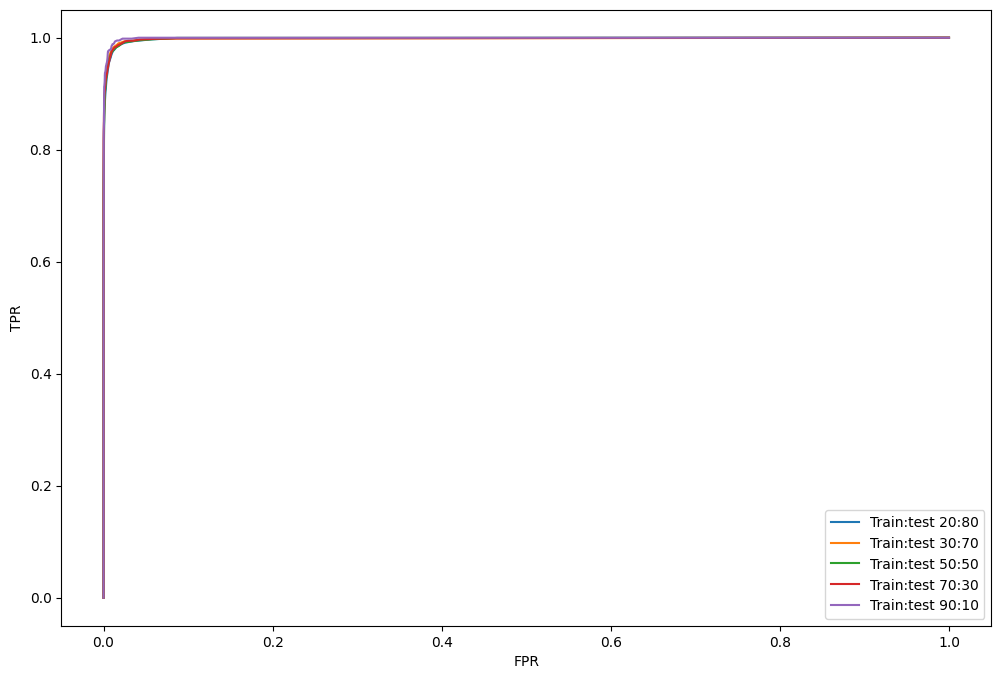

In [1529]:
plt.rcParams['figure.figsize']=[12,8]
for i in range(5):
    roclisttwo,newlabelstwo=getroclist_onevsrest(weight_matrix[i],split_data_test[i],split_test[i])
    #print(newlabelstwo)
    #print(roclisttwo)
    TPRlist,FPRlist=getTPRandFPR_onevsrest(roclisttwo,newlabelstwo)
    plt.plot(FPRlist,TPRlist,label="Train:test {}:{}".format(Percentages[i],100-Percentages[i]))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [1530]:
def roconevsone(weights,given_features,threshol,lr_train_labels):
    posteriors=[0]*weights.shape[1]
    pred_labels=[]
    new_labels=[]
    for i in range(len(given_features)):
        if(lr_train_labels[i]>2 ):
            continue
        new_labels.append(lr_train_labels[i])
        posteriors=np.matmul(np.transpose(weights[:,0:2]),(given_features[i].reshape((weights.shape[0],1))))
        #posteriors=np.exp(posteriors)
        posteriors=softmax(posteriors)
        if(threshol==0):
            pred_labels.append(2)
        #pred=np.argmax(posteriors)
        elif(posteriors[1]>threshol):
            pred_labels.append(2)
        else:
            pred_labels.append(1)    
    return pred_labels,new_labels

def getroclistonevsone(weights,lr_train_feature,labels):
    roclabellist=[]
    threshold=1
    for i in range(51):
        pred_labels,new_labels=roconevsone(weights,lr_train_feature,threshold,labels)
        roclabellist.append(pred_labels)
        threshold-=0.02
    return roclabellist,new_labels

def getTPRandFPRonevsone(roclabellist,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            if(new_labels[j]==2 and roclabellist[i][j]==2):
                TP+=1
            elif new_labels[j]==2 and roclabellist[i][j]==1:
                FN+=1
            elif new_labels[j]==1 and roclabellist[i][j]==2:
                FP+=1
            else :
                TN+=1
            
        #print(TP+TN+FN+FP)
        
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
        #print(TPRlist)
        #print(FPRlist)
    return [TPRlist,FPRlist]

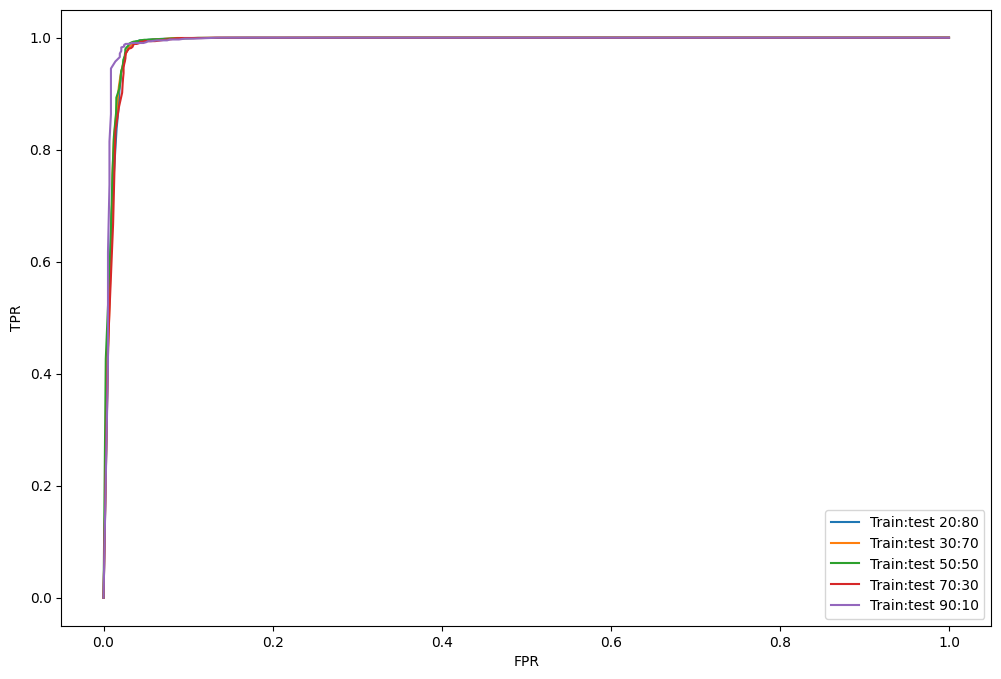

In [1531]:
plt.rcParams['figure.figsize']=[12,8]
for i in range(5):
    roclisttwo,newlabelstwo=getroclistonevsone(weight_matrix[i],split_data_test[i],split_test[i])
    #print(newlabelstwo)
    #print(roclisttwo)
    TPRlist,FPRlist=getTPRandFPRonevsone(roclisttwo,newlabelstwo)
    plt.plot(FPRlist,TPRlist,label="Train:test {}:{}".format(Percentages[i],100-Percentages[i]))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### (c) Multi-class Bayes' classifier with GMMs as Class Conditional

In [1535]:
def ImageInitialiseGMM(K, features):
    alpha = np.random.rand(K)
    alpha = alpha / np.sum(alpha)
    Mu_initial = []
    for i in range(K):
        Mu_initial.append(np.random.rand(features))
    Sigma_initial = []
    for i in range(K):
        Sigma_initial.append(np.identity(features))
    Theta = [alpha, Mu_initial, Sigma_initial]
    return Theta

In [1536]:
# K = 3
# Theta = ImageInitialiseGMM(K, features)

In [1537]:
def ClassWisePartition(Data, Y, labels):
    H , W = Data.shape
    Data_class = {x: [] for x in labels}
    for item in labels:    
        Data_class[item] = Data[Y == item]
    return Data_class

In [1538]:
# item = 20
# DTrain, DTest = DataSplit(Data, item)
# N = DTrain.shape[0]
# test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
# XDTest = np.delete(DTest, 0 , axis = 1)
# labels = np.unique(Data[:,0].astype(int))
# classes = len(labels)
# train_labels = DTrain[:,0]


# Data_classwise = ClassWisePartition(DTrain, train_labels, labels)
# for i in range(classes):
#     Data_classwise[i] = minmaxNormalize(np.delete(np.array(Data_classwise[i]), 0 , axis = 1))


In [1539]:
# Likelihood = []
# Parameters = []
# for i in range(0, classes):
#     Parameters.append(GMM(K, Theta, np.array(Data_classwise[i])))
# for j in range(K):
#         Likelihood.append(Parameters[j][-1])

In [1540]:
# for i in range(K):
#     plt.plot(Likelihood[i])
#     plt.show()

In [1541]:
# predicted_labels = []

# for i in range(XDTest.shape[0]):
#     Posteriors = np.array([0] * classes)
#     for j in range(classes):
#         Posteriors[j] = GetCCD(XDTest[i], Parameters,j) * Priors[j]
#     predicted_labels.append(np.argmax(Posteriors) + 1)

### p5 

### (a)Naive Bayes' with Normal Class Conditional 

In [1584]:
# Data

with open('/media/beluga/Data/IISc AI/PRNN Lectures/Assignment - 1/PRNN_23_Data/PCA_MNIST.csv', 'r') as f:
    results = []
    next(f)
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

In [1585]:
Data = np.array(results)
N, features = Data.shape
features -= 1

In [1586]:
Percentages = [20, 30, 50, 70, 90]
for item in Percentages:
    
    # Split the data first wrt the given percentage
    
    DTrain, DTest = DataSplit(Data, item)
    N = DTrain.shape[0]
    test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
    XDTest = np.delete(DTest, 0 , axis = 1)
    labels = np.unique(Data[:,0].astype(int))
    classes = len(labels)
    train_labels = DTrain[:,0].astype(int)
    
    # Split the Data train class wise
    
    Data_classwise = ClassWisePartition(DTrain, train_labels, labels)
    for i in range(classes):
        Data_classwise[i] = np.delete(np.array(Data_classwise[i]), 0 , axis = 1)
        
    # Mean and Variance of each feature for each class taken into a double list
    
    Mean = []
    Var = []
    for i in range(classes):
        m , v = FeatureMeanVar(Data_classwise[i])
        Mean.append(m)
        Var.append(v)
        
    # Prior probabilities
    
    Priors = []
    for i in range(classes):
        Priors.append(Data_classwise[i].shape[0] / N)
        
    # Predictions
    
    predicted_labels = []
    for i in range(XDTest.shape[0]):
        predicted_labels.append(MaxLabel(Posts(XDTest[i], Mean, Var, Priors, labels)) + 1)
    
    # Metrics
    
    print('Metrics with ', item, '% Train Data and tested on ',(100 - item),'% Test Data: \n \n')
    metrics(predicted_labels, test_labels)
    print('\n\n')

Metrics with  20 % Train Data and tested on  80 % Test Data: 
 

Classification Accuracy  on Test Data is:  85.17291666666667 

Confusion Matrix is: 
 [[3862.  553.    3.  125.   22.    2.    2.   25.  134.   38.]
 [  90. 4329.    3.  178.   76.    2.    0.    1.   71.   51.]
 [ 105.   22. 4330.   38.    5.  284.    5.   47.    1.    0.]
 [  71.    3.    8. 4482.  156.   49.   32.   21.    0.    3.]
 [   3.    1.    0.   47. 4549.  107.    0.    4.    7.    7.]
 [   1.    9.   15.  142.  245. 4374.    5.    6.    3.    1.]
 [   5.    1.    6.  131.   34.   47. 3933.  632.    1.    2.]
 [  35.    6.   11.  571.  157.   18. 1280. 2741.    4.    3.]
 [ 173.  115.    6.  157.   81.   35.    1.    5. 4157.   83.]
 [  42.   16.    0.   85.  347.    7.   17.   50.  124. 4126.]] 

f1 Score of Class  1  is:  0.8438763247022834
f1 Score of Class  2  is:  0.8784496753246753
f1 Score of Class  3  is:  0.9393643562208482
f1 Score of Class  4  is:  0.8314627585567202
f1 Score of Class  5  is:  0.875

### (b) Logistic Regressor with gradient descent

In [1545]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
def softmax_regression_p5(train_features,train_labels,GD_epsilon):
    num_classes=len(set(train_labels))
#     print(num_classes)
    num_features=len(train_features[0])
    w=[[0]*num_classes]*(num_features)
    w=np.array(w)
#     print(w.shape)
    lr=5
    grad=np.zeros(w.shape)
    count=0
    htheta=np.array([0]*10)
    while(count==0 or (np.linalg.norm(grad))>GD_epsilon):
        grad=np.zeros(w.shape)
        for i in range(len(train_labels)): 
            y=np.zeros(num_classes)
            for j in range(num_classes):
                htheta[j]=np.dot(np.transpose(w[:,[j]]),train_features[i].reshape((10,1)))
            #print(htheta)
#             htheta=np.exp(htheta)
#             htheta=htheta/np.sum(htheta)
            htheta=softmax(htheta)
            y[train_labels[i]]=1
            grad = grad + np.matmul((train_features[i].reshape((10,1))),(htheta-y).reshape((1,10)))  
        w = w -((lr)*(grad)/len(train_labels))
        count+=1
#         if((count%15)==0):
#             print(np.linalg.norm(grad),count)
        if(count==200):
            break
            
    return w

In [1546]:
split_data_train=[]
split_train_labels=[]
split_data_test=[]
split_test=[]
weight_matrix=[]
#print(Data)
Percentages=[20,30,50,70,90]
for item in Percentages:
    
    # Split the data first wrt the given percentage
    i=0
    DTrain, DTest = DataSplit(Data, item)
    N = DTrain.shape[0]
    test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
    XDTest = np.delete(DTest, 0 , axis = 1)
    labels = np.unique(Data[:,0].astype(int))
    classes = len(labels)
    train_labels = DTrain[:,0].astype(int)
    XDTrainone= np.delete(DTrain, 0 , axis = 1)
    
    XDTrain= minmaxNormalize(XDTrainone)
    XDTest=minmaxNormalize(XDTest)
    #XDTrain,means,std = normalize_data(XDTrain)
    #XDTest=(XDTest-means)/std
    
    split_train_labels.append(train_labels)
    split_data_train.append(XDTrain)
    split_data_test.append(XDTest)
    split_test.append(test_labels)
    i+=1
    #print(np.sum(XDTrain))
    
    weight_matrix.append(softmax_regression_p5(XDTrain,train_labels,0.1))

weight_matrix=np.array(weight_matrix)

In [1547]:
def roc_onevsrest(weights,given_features,threshol,lr_train_labels):
    posteriors=[0]*10
    pred_labels=[]
    new_labels=[]
    for i in range(len(given_features)):
        #print(i)
        if(lr_train_labels[i]==2 ):
            new_labels.append(1)
        else:
            new_labels.append(0)
        posteriors=np.matmul(np.transpose(weights),(given_features[i].reshape((10,1))))
        #posteriors=np.exp(posteriors)
        posteriors=softmax(posteriors)
        #print(posteriors)
        if(threshol==0):
            pred_labels.append(1)
        #pred=np.argmax(posteriors)
        elif(posteriors[1]>threshol):
            pred_labels.append(1)
        else:
            pred_labels.append(0)    
    return pred_labels,new_labels

def getroclist_onevsrest(weights,lr_train_feature,labels):
    roclabellist=[]
    threshold=1
    #roclabellist.append(roc(weights,lr_train_features,1,labels)[0])
    for i in range(51):
        pred_labels,new_labels=roc_onevsrest(weights,lr_train_feature,threshold,labels)
        #print(threshold)
        roclabellist.append(pred_labels)  
        threshold-=0.02
        #print(threshold)
    #roclabellist.append(roc(weights,lr_train_feature,0,labels)[0])
    return roclabellist,new_labels

def getTPRandFPR_onevsrest(roclabellist,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            if(new_labels[j]==1 and roclabellist[i][j]==1):
                TP+=1
            elif new_labels[j]==1 and roclabellist[i][j]==0:
                FN+=1
            elif new_labels[j]==0 and roclabellist[i][j]==1:
                FP+=1
            else :
                TN+=1
            
        #print(TP+TN+FN+FP)
        
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
        #print(TPRlist)
        #print(FPRlist)
    return [TPRlist,FPRlist]

In [1548]:
def getempiricallossone(weights,given_features,labels):
    ccloss=0
    #pred_vector=[0]*10
    for i in range(len(given_features)):
        pred_vector=np.matmul(np.transpose(weights),(given_features[i].reshape((weights.shape[0],1))))
        pred_vector=softmax(pred_vector)
#         pred_vector=np.exp(pred_vector)
#         pred_vector=pred_vector/np.sum(pred_vector)
        #print(pred_vector,labels[i])
        #print(pred_vector[labels[i]-1],pred_vector,labels[i]-1)
        #print(pred_vector)
        #print(labels[i])
        ccloss+=np.log(float(pred_vector[labels[i]-1]))
    return -1*(ccloss)/len(given_features)
for i in range(len(Percentages)):
    print("Empirical Risk on train data for Train-Test_Ratio  {}:{} :".format(Percentages[i],100-Percentages[i]), getempiricallossone(weight_matrix[i],split_data_train[i],split_train_labels[i]+1))
    print("Empirical Risk on test data for Train-Test-Ratio {}:{} :".format(Percentages[i],100-Percentages[i]), getempiricallossone(weight_matrix[i],split_data_test[i],split_test[i]))

Empirical Risk on train data for Train-Test_Ratio  20:80 : 0.6341953542400834
Empirical Risk on test data for Train-Test-Ratio 20:80 : 0.6704090547490187
Empirical Risk on train data for Train-Test_Ratio  30:70 : 0.6286551603025805
Empirical Risk on test data for Train-Test-Ratio 30:70 : 0.6753716171134256
Empirical Risk on train data for Train-Test_Ratio  50:50 : 0.6432480261496932
Empirical Risk on test data for Train-Test-Ratio 50:50 : 0.6556198762982867
Empirical Risk on train data for Train-Test_Ratio  70:30 : 0.6486457355036057
Empirical Risk on test data for Train-Test-Ratio 70:30 : 0.649784925606262
Empirical Risk on train data for Train-Test_Ratio  90:10 : 0.6517279951434549
Empirical Risk on test data for Train-Test-Ratio 90:10 : 0.6276740620718165


In [1549]:
def roconevsone(weights,given_features,threshol,lr_train_labels):
    posteriors=[0]*weights.shape[1]
    pred_labels=[]
    new_labels=[]
    for i in range(len(given_features)):
        if(lr_train_labels[i]>2 ):
            continue
        new_labels.append(lr_train_labels[i])
        posteriors=np.matmul(np.transpose(weights[:,0:2]),(given_features[i].reshape((weights.shape[0],1))))
        #posteriors=np.exp(posteriors)
        posteriors=softmax(posteriors)
        if(threshol==0):
            pred_labels.append(2)
        #pred=np.argmax(posteriors)
        elif(posteriors[1]>threshol):
            pred_labels.append(2)
        else:
            pred_labels.append(1)    
    return pred_labels,new_labels

def getroclistonevsone(weights,lr_train_feature,labels):
    roclabellist=[]
    threshold=1
    for i in range(51):
        pred_labels,new_labels=roconevsone(weights,lr_train_feature,threshold,labels)
        roclabellist.append(pred_labels)
        threshold-=0.02
    return roclabellist,new_labels

def getTPRandFPRonevsone(roclabellist,new_labels):
    TPRlist=[]
    FPRlist=[]
    for i in range(0,len(roclabellist)):
        TP=0
        FP=0
        TN=0
        FN=0
        for j in range(len(new_labels)):
            if(new_labels[j]==2 and roclabellist[i][j]==2):
                TP+=1
            elif new_labels[j]==2 and roclabellist[i][j]==1:
                FN+=1
            elif new_labels[j]==1 and roclabellist[i][j]==2:
                FP+=1
            else :
                TN+=1
            
        #print(TP+TN+FN+FP)
        
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
        #print(TPRlist)
        #print(FPRlist)
    return [TPRlist,FPRlist]

In [1550]:
def getpredlabels(weights,given_features):
    posteriors=[0]*weights.shape[0]
    pred_labels=[]
    for i in range(len(given_features)):
        posteriors=np.matmul(np.transpose(weights),(given_features[i].reshape((weights.shape[0],1))))
        pred=np.argmax(posteriors)
        pred_labels.append(pred+1)
    return pred_labels

In [1551]:
for i in range(len(Percentages)):
    pred_labels=getpredlabels(weight_matrix[i],split_data_test[i])
    print("'\n \033[1m'+Metrics for Train-Test_Ratio  {}:{} :".format(Percentages[i],100-Percentages[i]))
    metrics(pred_labels,split_test[i])

'
 '+Metrics for Train-Test_Ratio  20:80 :
Classification Accuracy  on Test Data is:  82.78750000000001 

Confusion Matrix is: 
 [[4009.  473.    9.  184.    7.    1.    0.   61.   57.   13.]
 [ 131. 4399.   64.  120.   16.   14.    0.    0.   32.   27.]
 [  60.   61. 4125.  180.    1.  123.   39.  168.    0.    0.]
 [  50.    2.  244. 4172.  108.  115.    6.   60.    3.    1.]
 [   7.    2.    4.  209. 4296.  226.    7.    1.   11.   11.]
 [   0.   14.  109.  246.   82. 4408.   24.    4.    8.    1.]
 [  12.    2.  283.  135.   16.   56. 3564.  735.   24.    2.]
 [  18.    9.  297.  737.  162.   22.  854. 2695.    7.    3.]
 [ 170.   78.   20.  138.   34.   70.   17.    3. 4217.   41.]
 [ 140.   56.   16.  190.  213.   25.   14.   42.  225. 3853.]] 

f1 Score of Class  1  is:  0.8519817235150356
f1 Score of Class  2  is:  0.8887766441054651
f1 Score of Class  3  is:  0.8309830781627718
f1 Score of Class  4  is:  0.7536127167630059
f1 Score of Class  5  is:  0.8849521062931301
f1 Score

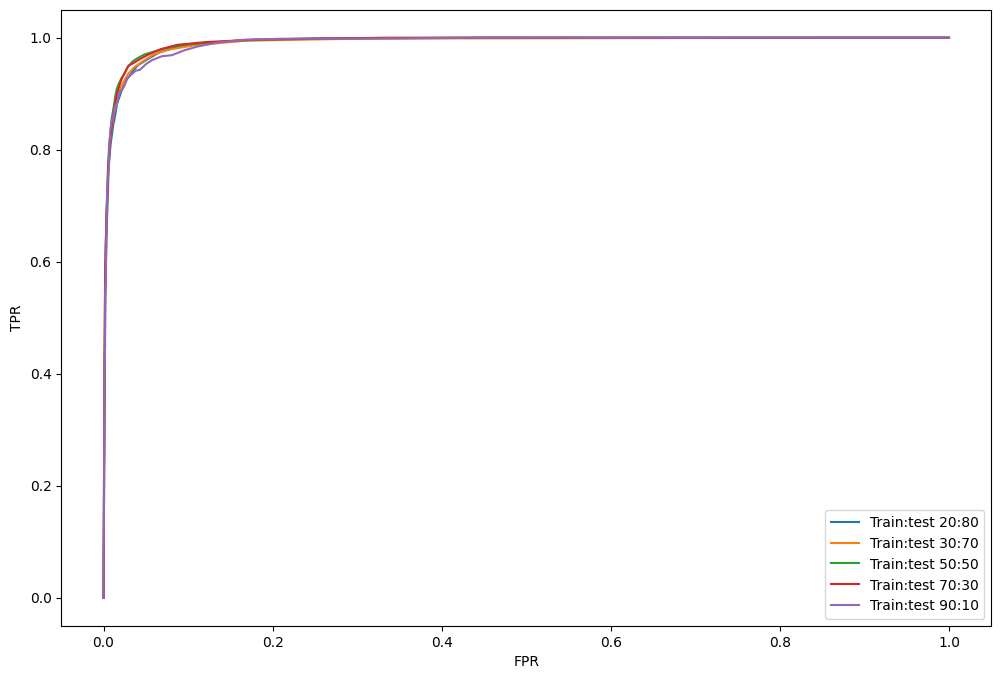

In [1552]:
plt.rcParams['figure.figsize']=[12,8]
for i in range(5):
    roclisttwo,newlabelstwo=getroclist_onevsrest(weight_matrix[i],split_data_test[i],split_test[i])
    #print(newlabelstwo)
    #print(roclisttwo)
    TPRlist,FPRlist=getTPRandFPR_onevsrest(roclisttwo,newlabelstwo)
    plt.plot(FPRlist,TPRlist,label="Train:test {}:{}".format(Percentages[i],100-Percentages[i]))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


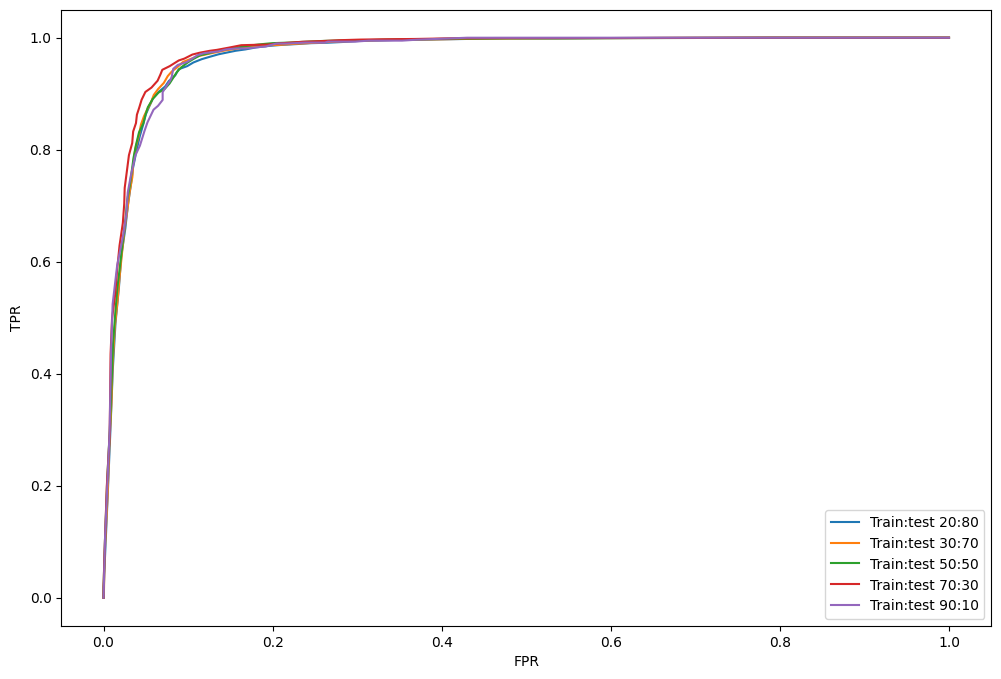

In [1553]:
plt.rcParams['figure.figsize']=[12,8]
for i in range(5):
    roclisttwo,newlabelstwo=getroclistonevsone(weight_matrix[i],split_data_test[i],split_test[i])
    #print(newlabelstwo)
    #print(roclisttwo)
    TPRlist,FPRlist=getTPRandFPRonevsone(roclisttwo,newlabelstwo)
    plt.plot(FPRlist,TPRlist,label="Train:test {}:{}".format(Percentages[i],100-Percentages[i]))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###  (c) Multi-class Bayes' classifier with GMMs as Class Conditional

In [1587]:
def GMMSplitData(percent):
    
    DTrain, DTest = DataSplit(Data, percent)
    N = DTrain.shape[0]
    test_labels = list((DTest[:,0] + np.ones(DTest[:,0].shape)).astype(int))
    XDTest = np.delete(DTest, 0 , axis = 1)
    labels = np.unique(Data[:,0].astype(int))
    classes = len(labels)
    train_labels = DTrain[:,0]

    # Split the Data train class wise

    Data_classwise = ClassWisePartition(DTrain, train_labels, labels)
    for i in range(classes):
        Data_classwise[i] = minmaxNormalize(np.delete(np.array(Data_classwise[i]), 0 , axis = 1))
    XDTest = minmaxNormalize(XDTest)
    K = 5
    Likelihood = []
    Parameters = []
    for i in range(classes):
        Theta = InitialiseGMM(K, features)
        Parameters.append(GMM(K, Theta, np.array(Data_classwise[i])))
    for j in range(classes):
        Likelihood.append(Parameters[j][-1])
    for i in range(classes):
        plt.plot(Likelihood[i],label = 'Class - {}'.format(i))
        plt.xlabel("no of iterations" )
        plt.ylabel('Log-likelihood')
        plt.legend()
        plt.title('log_likelihood Graphs for different classes')
    plt.show()
    Priors = []
    for i in range(classes):
        Priors.append(Data_classwise[i].shape[0] / N)
    predicted_labels = []
    # print(Parameters[0][0])
    for i in range(XDTest.shape[0]):
        Posteriors = np.array([0] * classes)
    #     print(Posteriors.shape)
        for j in range(classes):
            Posteriors[j] = GetCCD(XDTest[i], Parameters, j, K) * Priors[j]
    #     print(Posteriors)
    #     print(ClassPrior)
    #     print(Posteriors)
        predicted_labels.append(np.argmax(Posteriors) + 1)
    metrics(predicted_labels, test_labels)
    K_list = [3, 4, 5]
    Likelihood_mixtures = []
    for item in K_list:
        Theta = InitialiseGMM(item, features)
        Likelihood_mixtures.append(GMM(item, Theta, np.array(Data_classwise[1]))[-1])
    for i in range(len(K_list)):
        plt.plot(Likelihood_mixtures[i],label = 'Components - {}'.format(i + 3))
        plt.xlabel("no of iterations" )
        plt.ylabel('Log-likelihood')
        plt.legend()
        plt.title('log_likelihood Graphs for different Mixture Components')
    plt.show()


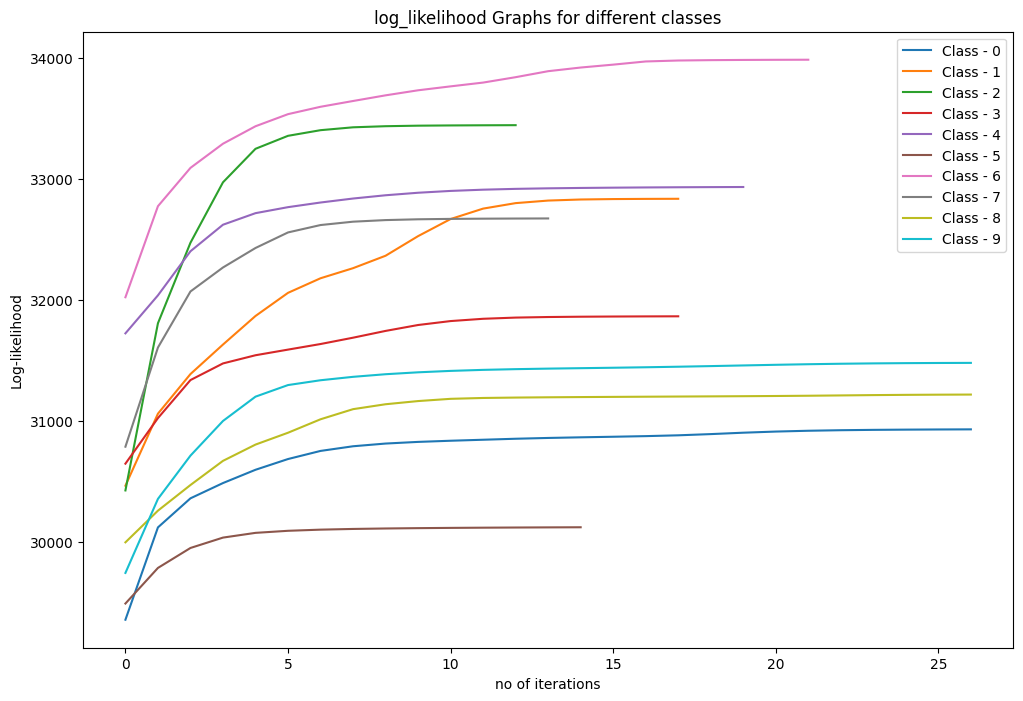

Classification Accuracy  on Test Data is:  68.72916666666666 

Confusion Matrix is: 
 [[2449. 1188.   11.    5.  151.  481.   13.    0.  522.    5.]
 [  56. 3879.    1.   10.   49.  719.    7.    0.   55.    2.]
 [  23.  216. 3558.  362.   25.  237.  116.  180.    9.   65.]
 [ 196.   59.    9. 2947.  569.  880.   67.    0.   76.    1.]
 [  44.   10.    2.  109. 4497.   54.    6.    0.   41.   35.]
 [  93.   63.   18.  299.  298. 3922.   29.    1.  116.   28.]
 [  28.   42.   45.   77.   57.   74. 4379.    9.   23.    0.]
 [  29.   10.  135.  917.  377.   68. 2545.  724.    0.    0.]
 [ 147.  241.   19.   16.   86.  323.   34.    1. 3869.   50.]
 [  42.   93.   18.  270.  429.  774.  184.    3.  233. 2766.]] 

f1 Score of Class  1  is:  0.6174987392839133
f1 Score of Class  2  is:  0.7333396351261935
f1 Score of Class  3  is:  0.8267689090275356
f1 Score of Class  4  is:  0.6004482477587613
f1 Score of Class  5  is:  0.7934015525758645
f1 Score of Class  6  is:  0.6326316638438584
f1 Sc

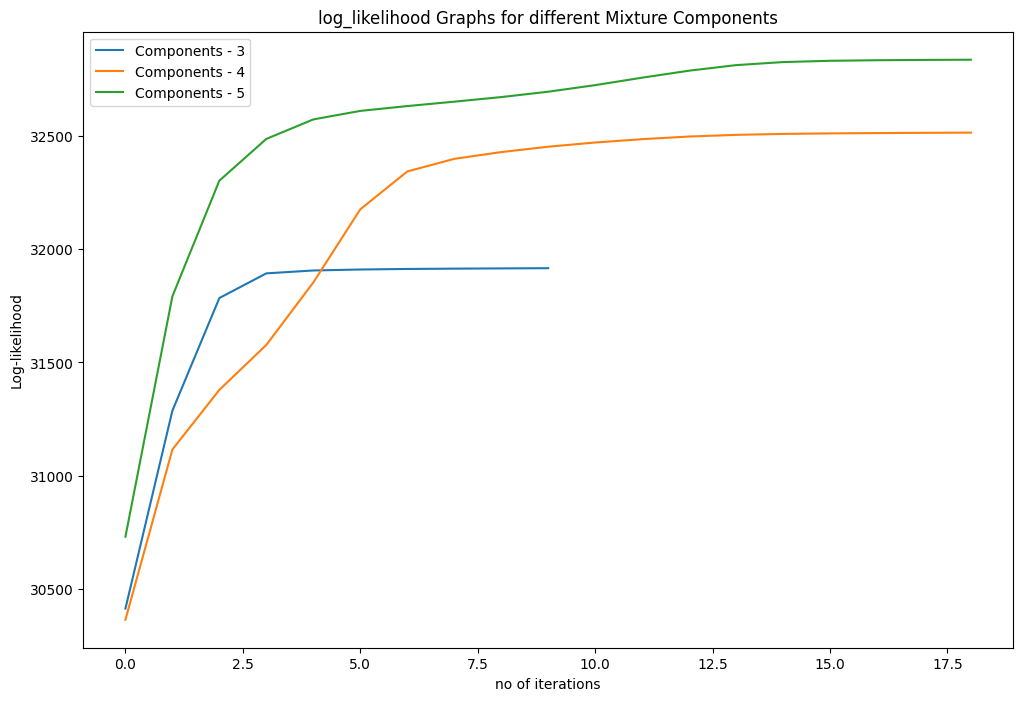

In [1588]:
GMMSplitData(20)

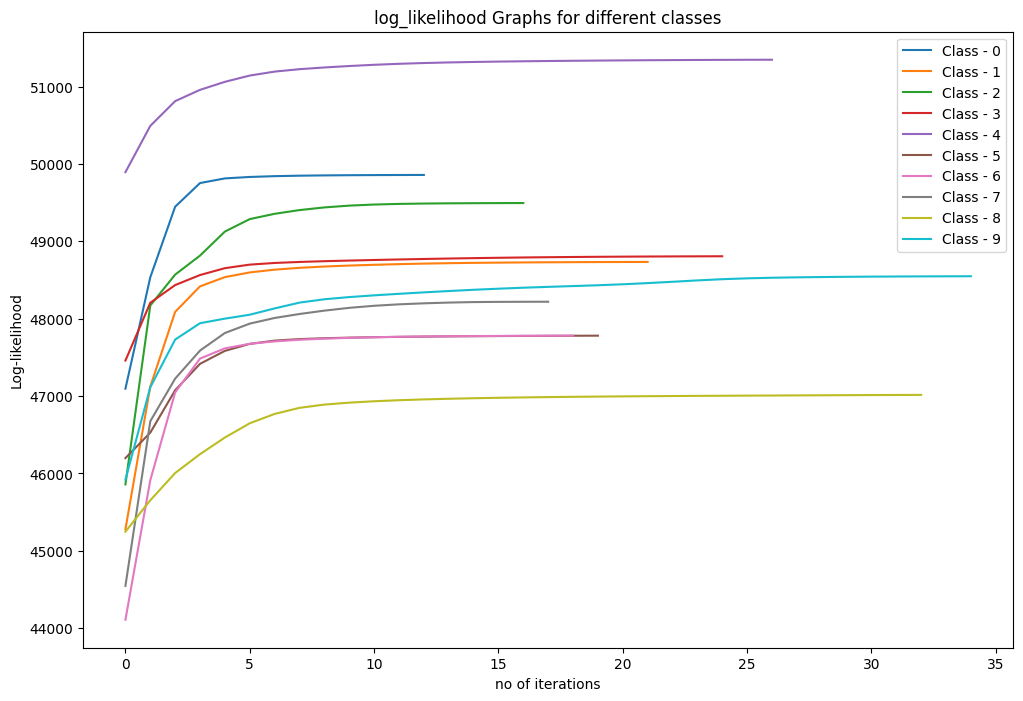

Classification Accuracy  on Test Data is:  70.35238095238095 

Confusion Matrix is: 
 [[2380.  538.    3.   39.   74.  428.    9.    0.  648.   33.]
 [1115. 1792.    0.   17.   37.  382.    0.    0.  783.   83.]
 [  58.  209. 3483.   84.   12.  108.  169.   17.   47.   46.]
 [  43.   60.    2. 2962.  119.  757.    6.   18.  212.   13.]
 [   1.    4.    0.  147. 3839.   57.    1.    0.   68.   31.]
 [   8.    8.    8.  250.  165. 3286.    1.    0.  425.   45.]
 [   4.   20.   42.  179.   21.  466. 2750.  655.   78.   17.]
 [   5.    3.   30.  497.   64.  158.  832. 2585.   45.   11.]
 [  10.  125.   12.   25.  166.  776.    5.    0. 3021.   69.]
 [   6.    5.    1.  118.  246.  222.   14.   48.   89. 3450.]] 

f1 Score of Class  1  is:  0.6116679516833718
f1 Score of Class  2  is:  0.5139825039437831
f1 Score of Class  3  is:  0.8914768364474022
f1 Score of Class  4  is:  0.6961222091656873
f1 Score of Class  5  is:  0.8635699021482398
f1 Score of Class  6  is:  0.6064968623108158
f1 Sc

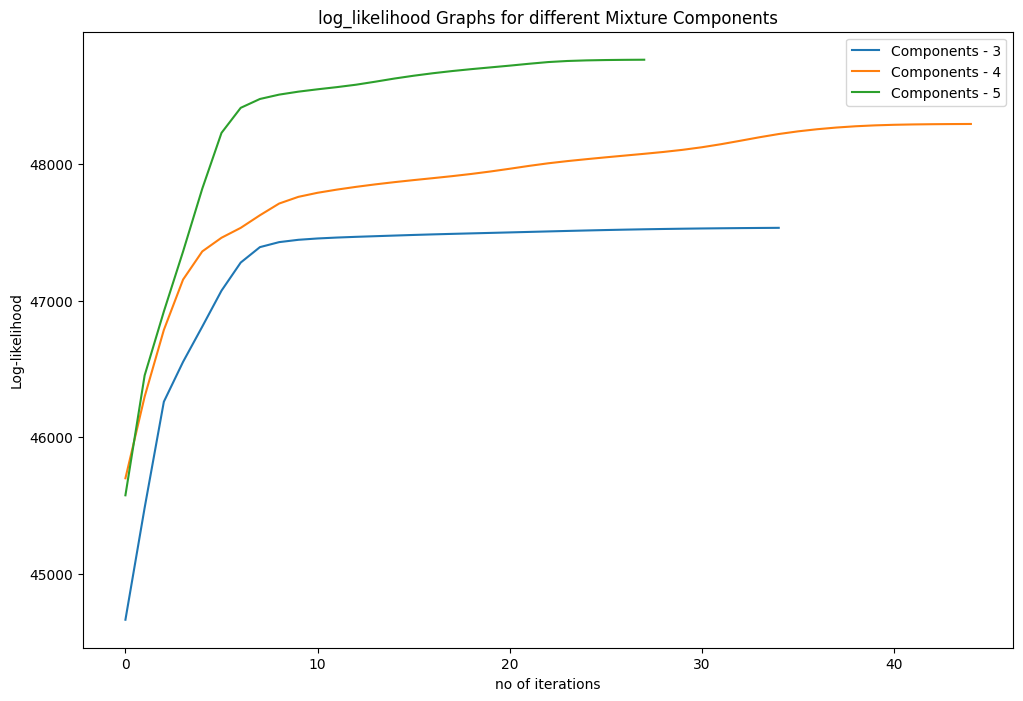

In [1589]:
GMMSplitData(30)

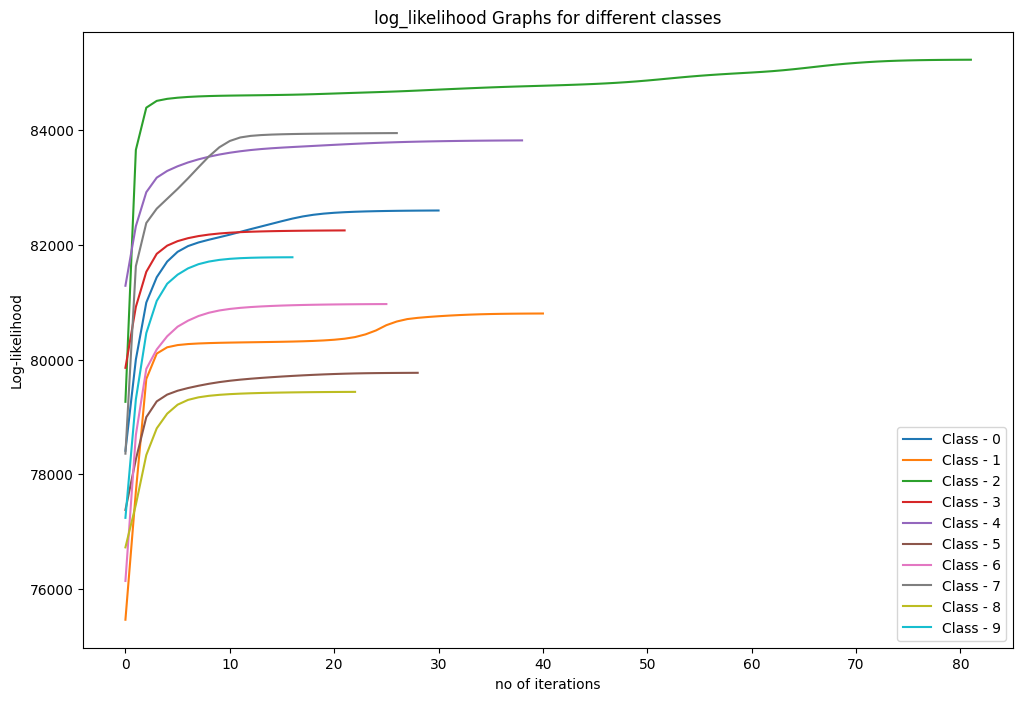

Classification Accuracy  on Test Data is:  68.96 

Confusion Matrix is: 
 [[1553.  377.    2.    3.   33.  663.    2.    0.  298.    8.]
 [ 166. 2297.    0.    3.   28.  467.    0.    0.   70.   11.]
 [  34.   46. 2527.   64.   34.   51.   59.   43.   15.  102.]
 [  91.   88.    5. 1342.  137.  848.   26.    0.  446.    7.]
 [   2.    5.    0.   29. 2916.   15.    0.    0.   31.    6.]
 [  20.   25.   16.  189.  669. 1725.    1.    0.  335.   49.]
 [   2.   15.   85.   35.   31.  102. 2649.   17.  108.    7.]
 [   9.    5.   85.  162.  196.  122.  990. 1297.   97.   38.]
 [  14.   99.   10.    4.  151.  611.    5.    0. 2071.   26.]
 [   2.   14.    0.   28.  295.  223.   42.    1.   62. 2311.]] 

f1 Score of Class  1  is:  0.6427980132450332
f1 Score of Class  2  is:  0.7640113088308665
f1 Score of Class  3  is:  0.8858895705521472
f1 Score of Class  4  is:  0.5535161889049288
f1 Score of Class  5  is:  0.7782225780624499
f1 Score of Class  6  is:  0.43915478615071285
f1 Score of Clas

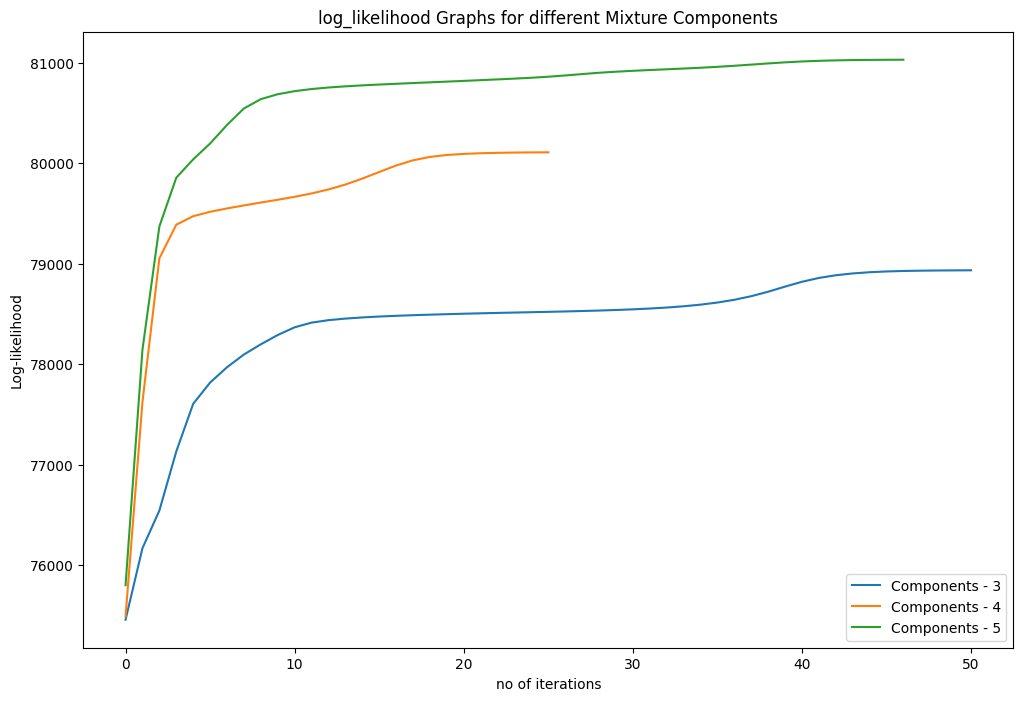

In [1590]:
GMMSplitData(50)

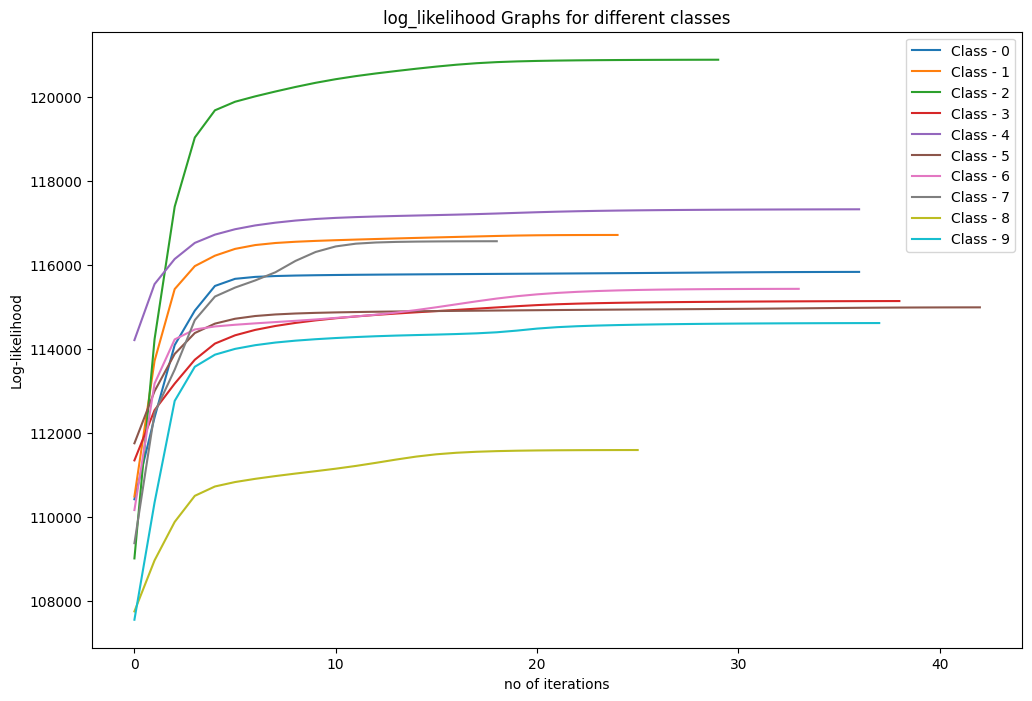

Classification Accuracy  on Test Data is:  64.15555555555555 

Confusion Matrix is: 
 [[1141.  148.    6.    0.   55.  246.    0.    0.  130.    9.]
 [ 178. 1465.    0.    3.   22.  108.    0.    0.   23.    9.]
 [ 165.   46. 1010.  176.   10.   63.   36.   34.   21.  211.]
 [  89.   21.    2.  598.   46.  792.    9.    2.  230.   14.]
 [   4.    1.    1.   41. 1667.   31.    0.    0.   85.   15.]
 [  41.   22.    9.   60.   47. 1343.    6.    1.  256.   16.]
 [   9.    3.   80.   14.    8.  120. 1492.    4.   77.    5.]
 [  13.    2.   89.   46.   81.  179.  830.  496.   41.   53.]
 [  43.   61.    5.    1.  131.  282.    1.    1. 1281.    1.]
 [   4.   94.    4.   39.  245.  277.   37.    2.   30. 1055.]] 

f1 Score of Class  1  is:  0.6668614845119814
f1 Score of Class  2  is:  0.7981476436938164
f1 Score of Class  3  is:  0.6783075889858965
f1 Score of Class  4  is:  0.4300611290902553
f1 Score of Class  5  is:  0.802020687996151
f1 Score of Class  6  is:  0.5123998473864937
f1 Sco

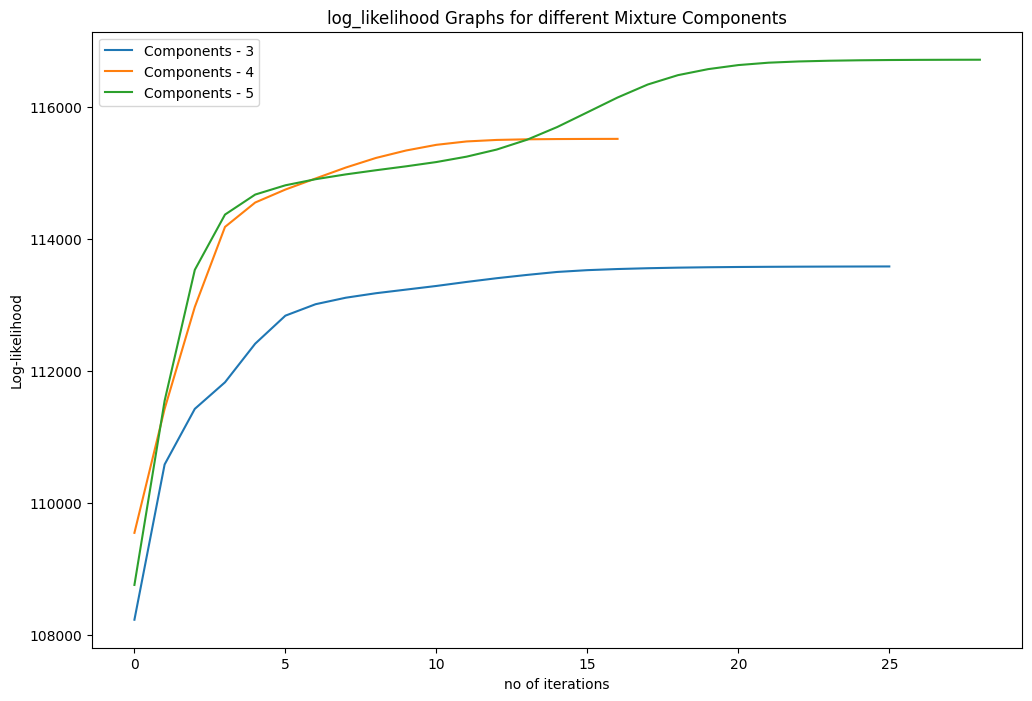

In [1591]:
GMMSplitData(70)

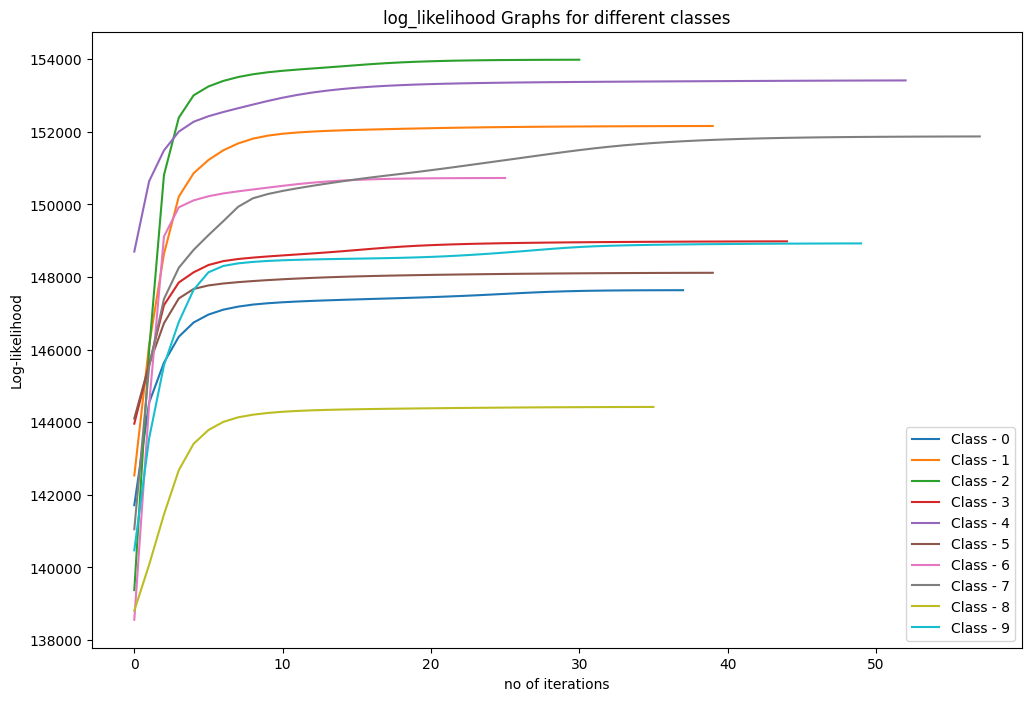

Classification Accuracy  on Test Data is:  69.48333333333333 

Confusion Matrix is: 
 [[354.  95.   4.   1.   3. 115.   0.   0.  32.   0.]
 [ 43. 459.   1.   0.   2.  51.   1.   0.  10.   2.]
 [ 17.  41. 449.  57.   2.  20.  11.  14.   4.  12.]
 [ 33.   6.   2. 274.  17. 221.   3.   1.  50.   3.]
 [  1.   0.   0.   7. 561.  16.   0.   0.  16.   4.]
 [  1.  10.   2.  42.  12. 466.   1.   0.  73.   2.]
 [  3.   5.   7.   5.   4.  51. 513.   8.   7.   0.]
 [  3.   3.  32.  12.  24.  45. 248. 205.   7.  13.]
 [ 13.  17.   2.   0.  12.  78.   0.   0. 473.   2.]
 [  0.   7.   2.   7.  54.  50.  19.   3.  27. 415.]] 

f1 Score of Class  1  is:  0.6604477611940298
f1 Score of Class  2  is:  0.7574257425742575
f1 Score of Class  3  is:  0.796099290780142
f1 Score of Class  4  is:  0.5399014778325123
f1 Score of Class  5  is:  0.8657407407407408
f1 Score of Class  6  is:  0.5412311265969802
f1 Score of Class  7  is:  0.7333809864188705
f1 Score of Class  8  is:  0.4981773997569866
f1 Score of Cl

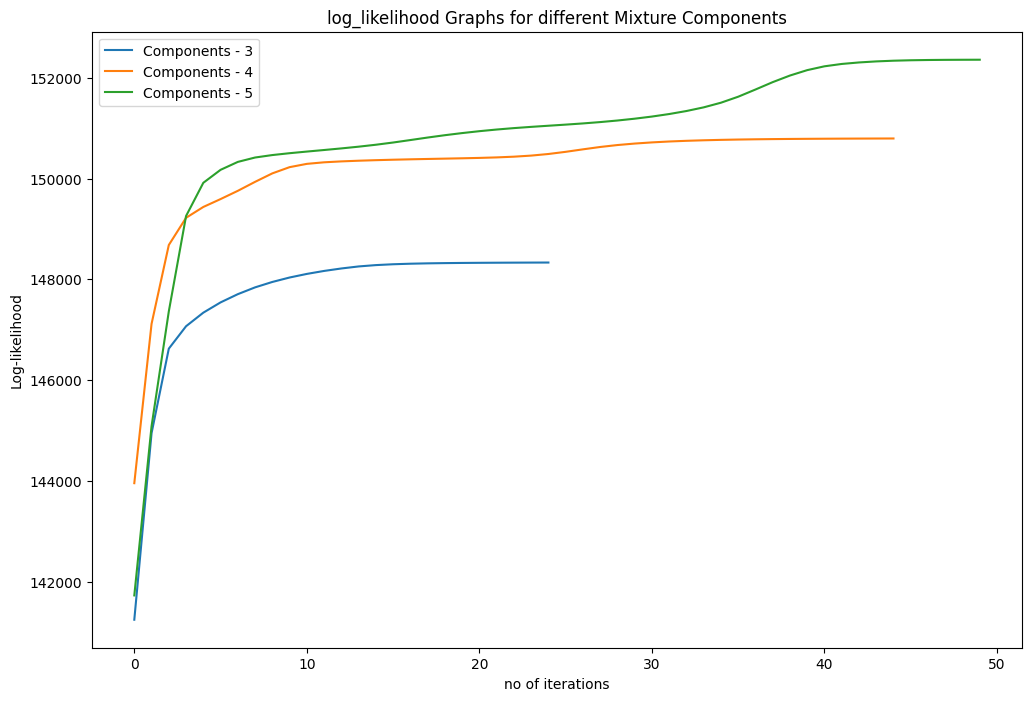

In [1592]:
GMMSplitData(90)